# Exploratory Data Analysis - Karim Benzema

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Learning

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/benzema-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Manchester City - Real Madrid 4:0,Europe. UEFA Champions League,5/17/23,CF,94,56,20,36,0,0,...,4,0,0,1,10,4,40,2,1,50
1,Real Madrid - Manchester City 1:1,Europe. UEFA Champions League,5/9/23,CF,96,49,28,57,0,0,...,1,0,0,0,6,0,0,1,1,100
2,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,4/18/23,CF,73,40,26,65,0,0,...,1,1,100,3,8,3,38,2,1,50
3,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,4/12/23,CF,95,76,44,58,1,0,...,2,1,50,4,12,2,17,4,4,100
4,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,3/15/23,CF,84,58,37,64,1,0,...,0,0,0,1,7,1,14,3,1,33
5,Liverpool - Real Madrid 2:5,Europe. UEFA Champions League,2/21/23,CF,89,54,35,65,2,0,...,1,0,0,1,1,1,100,6,4,67
6,Real Madrid - Celtic 5:1,Europe. UEFA Champions League,11/2/22,CF,27,23,19,83,0,0,...,0,0,0,1,3,0,0,0,0,0
7,Shakhtar Donetsk - Real Madrid 1:1,Europe. UEFA Champions League,10/11/22,CF,101,54,31,57,0,0,...,4,1,25,1,11,1,9,2,2,100
8,Real Madrid - Shakhtar Donetsk 2:1,Europe. UEFA Champions League,10/5/22,CF,94,88,58,66,0,0,...,2,0,0,1,11,1,9,1,1,100
9,Celtic - Real Madrid 0:3,Europe. UEFA Champions League,9/6/22,CF,30,23,14,61,0,0,...,1,0,0,0,3,0,0,1,0,0


In [ ]:
# DataFrame General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     27 non-null     object 
 1   competition               27 non-null     object 
 2   date                      27 non-null     object 
 3   position                  27 non-null     object 
 4   minutes_played            27 non-null     int64  
 5   total_actions             27 non-null     int64  
 6   total_actions_successful  27 non-null     int64  
 7   TAS_percent               27 non-null     int64  
 8   goals                     27 non-null     int64  
 9   assists                   27 non-null     int64  
 10  shots                     27 non-null     int64  
 11  shots_on_target           27 non-null     int64  
 12  SOT_percent               27 non-null     int64  
 13  xG                        27 non-null     float64
 14  passes      

In [ ]:
# Descriptive Statistics 
df.describe()

,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,shots,shots_on_target,SOT_percent,xG,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,89.666667,65.444444,38.555556,59.037037,0.777778,0.037037,3.518519,1.814815,47.074074,0.601852,...,1.888889,0.481481,24.111111,1.666667,8.703704,2.037037,24.296296,2.518519,1.555556,57.814815
std,20.195201,20.102302,13.970665,9.288046,0.933700,0.192450,2.063797,1.301982,31.880698,0.438205,...,2.044379,0.579812,33.801836,1.441153,4.409909,2.065867,22.029377,1.553417,1.423250,40.387581
min,27.000000,23.000000,14.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,54.000000,28.500000,55.000000,0.000000,0.000000,2.000000,1.000000,25.000000,0.280000,...,1.000000,0.000000,0.000000,1.000000,5.500000,1.000000,11.500000,1.000000,1.000000,26.500000
50%,95.000000,64.000000,39.000000,58.000000,1.000000,0.000000,4.000000,2.000000,50.000000,0.480000,...,2.000000,0.000000,0.000000,1.000000,8.000000,2.000000,20.000000,2.000000,1.000000,67.000000
75%,96.000000,77.000000,43.500000,65.000000,1.000000,0.000000,4.500000,2.000000,63.500000,0.970000,...,2.000000,1.000000,50.000000,2.000000,11.000000,3.000000,39.000000,3.000000,2.000000,100.000000
max,128.000000,98.000000,67.000000,83.000000,3.000000,1.000000,8.000000,5.000000,100.000000,1.520000,...,10.000000,2.000000,100.000000,5.000000,21.000000,10.000000,100.000000,6.000000,5.000000,100.000000


In [ ]:
# Let's check rows & columns 
print(df.shape)

(27, 39)


In [ ]:
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

CF    27
Name: position, dtype: int64
CF    27
Name: position, dtype: int64
27.0


- "CF" refers to "Centre Forward", a role that places a player at the very forefront of the team's attacking line. The primary duty of a Centre Forward is to score goals, making them the tip of the attacking spear. However, modern football often demands much more from this role, including creating opportunities for teammates, pressuring opponents, and holding up the ball to allow the rest of the team to join the attack.

- In the case of Karim Benzema, his interpretation of the CF role has been instrumental in his success at Real Madrid. His goal-scoring prowess is well documented, with a knack for finding the back of the net in crucial moments, often showcasing his clinical finishing and composure under pressure. His scoring record, which places him among the elite goal scorers in Real Madrid's illustrious history, is a testament to his effectiveness in this role.

- But beyond his scoring, Benzema's real value comes from his ability to link up play, create opportunities for teammates, and even drop deeper into the midfield to help in build-up play. His vision, technical skills, and understanding of the game enable him to assist as well as score, making him a multi-dimensional threat that's difficult for opponents to contain. He often operates as a 'False 9', a tactical role for a CF where he drops deep into midfield to create space and confuse the opposition's defensive structure.

- His contributions in the CF role extend beyond his technical and tactical skills. Benzema's leadership on the pitch, his ability to perform under pressure, and his consistent performances over the years have made him a valuable asset for Real Madrid, solidifying his legacy as one of the club's all-time greats.

### Position Distribution 

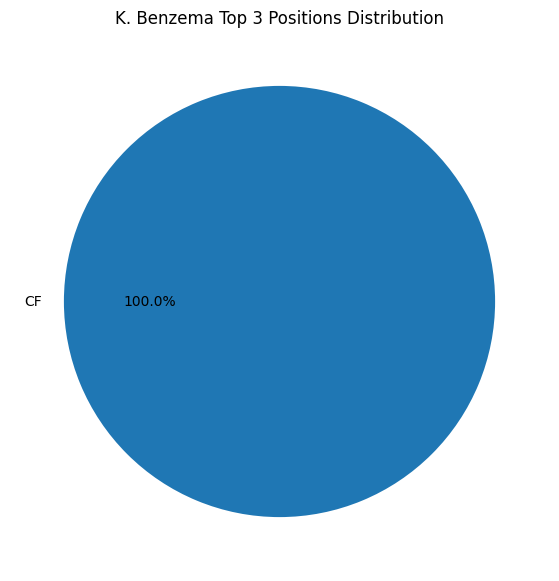

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("K. Benzema Top 3 Positions Distribution")
plt.show()

## Average Minutes Played

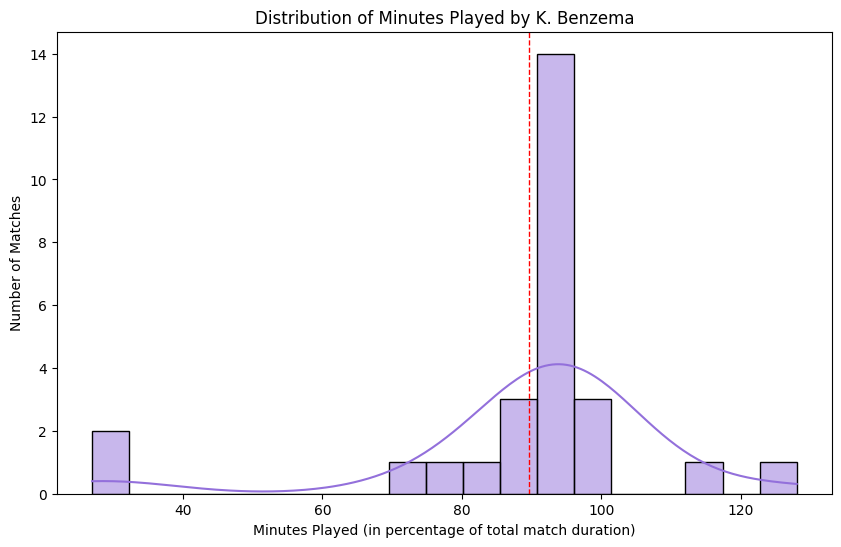

K. Benzema played on average 89.66666666666667 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='mediumpurple')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by K. Benzema')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"K. Benzema played on average {average_minutes_played} minutes per match.")

## Interceptions

Karim Benzema has an average of 1.6666666666666667 interceptions per match.
The minimum interceptions in a match by Karim Benzema is 0.
The maximum interceptions in a match by Karim Benzema is 5.


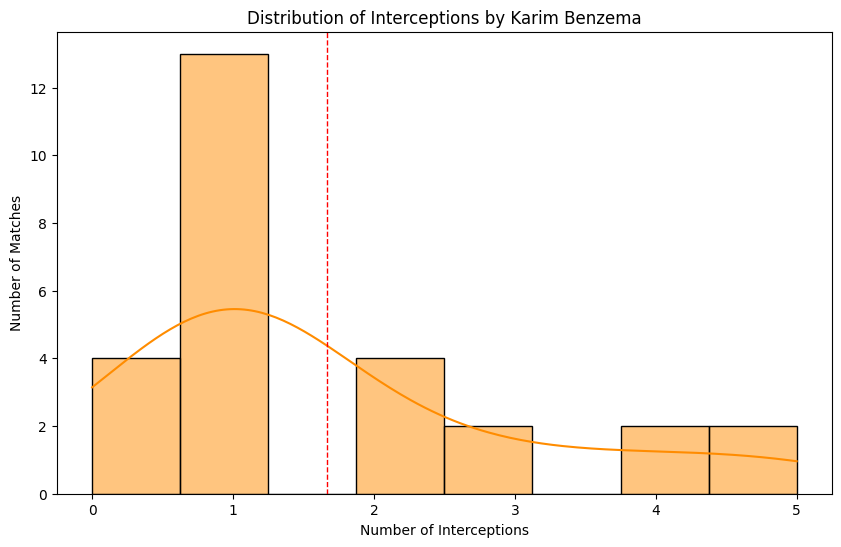

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Karim Benzema has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Karim Benzema is {min_interceptions}.")
print(f"The maximum interceptions in a match by Karim Benzema is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='darkorange')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Karim Benzema')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'shots_on_target', 'passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -0.26383810486470827
Kurtosis of shots_on_target: -0.06854176964903669
Kurtosis of passes_accurate: 0.1064369303985715
Kurtosis of dribbles_successful: 0.2585166942401913
Kurtosis of duels_won: 4.432025880867257
Kurtosis of interceptions: 0.20370370370370416
Kurtosis of losses_own_half: 6.161673508603373
Kurtosis of recoveries_opp_half: -0.1487742348982528


- total_actions_successful (-0.26): This value shows that the distribution has slightly light tails and a flat peak, indicating less extreme values and less outlier-prone than a normal distribution. This suggests a consistent level of successful total actions by Benzema. 

- shots_on_target (-0.06): A slightly negative kurtosis value implies that the distribution of shots on target is almost normally distributed, with few extreme values, suggesting his shots on target are fairly consistent. On football optics This flat peak and light tails suggest that Benzema's successful actions are generally consistent, rarely exhibiting extreme outlying performances. This steadiness is a testament to his reliable contribution to the team's offensive dynamics.

- passes_accurate (0.10): A slightly positive kurtosis implies a distribution with slightly heavier tails and a sharper peak than a normal distribution, indicating some variability in his passing accuracy. On football optics The near-normal distribution suggests that Benzema maintains a consistent rate of accurate shots, which bodes well for his striking proficiency.

- dribbles_successful (0.25): A positive kurtosis shows a distribution with heavy tails and a sharp peak, suggesting a greater variability in successful dribbles, with some exceptional performances. On football optics, the distribution reveals some variability in his dribbling success, indicating games where he managed to evade opponents remarkably well, which adds to his unpredictability as an attacker.

- duels_won (4.4): A high positive kurtosis denotes a high level of outliers and indicates that he has had many extreme instances of winning duels. On football optics, the presence of heavy tails shows that there have been games where Benzema has notably outperformed opponents in duels, which is an attribute of his competitive spirit and physical dominance.

- interceptions (0.203): A slightly positive kurtosis suggests a moderate level of variability in interceptions, with a few notable performances. 

- losses_own_half (6.1617): A high positive kurtosis signifies a high level of outliers, showing that there have been significant instances of losses in his own half. On football optics, the high kurtosis value indicates extreme instances of losing the ball in his own half, a stat that Benzema might need to work on to reduce potential threats to his team.

- Kurtosis of recoveries_opp_half (-0.14): This negative kurtosis suggests that the distribution has light tails and a flat peak, indicating fewer extreme recovery instances in the opponent's half. On football optics, the flat peak and light tails suggest fewer extreme instances of Benzema recovering the ball in the opponent's half, possibly highlighting an area for improvement in his defensive efforts.

### Features Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Platykurtic variables normalized:
   total_actions_successful  shots_on_target  recoveries_opp_half
0                 -1.353481        -0.637748            -0.397779
1                 -0.769944        -0.637748            -0.397779
2                 -0.915828         0.144943            -0.397779
3                  0.397129         0.927634             1.750226
4                 -0.113465         0.144943            -0.397779

Mesokurtic variables normalized:
   passes_accurate  dribbles_successful  interceptions
0        -1.205030            -0.798289      -0.471405
1        -0.493865            -0.798289      -1.178511
2        -1.116134            -0.798289       0.942809
3         0.395092            -0.164354       1.649916
4        -0.049386            -0.164354      -0.471405

Leptokurtic variables normalized:
   duels_won  losses_own_half
0  -1.182382         0.968289
1  -1.182382        -1.004828
2  -0.055641         0.475010
3   0.319939        -0.018270
4  -0.055641        

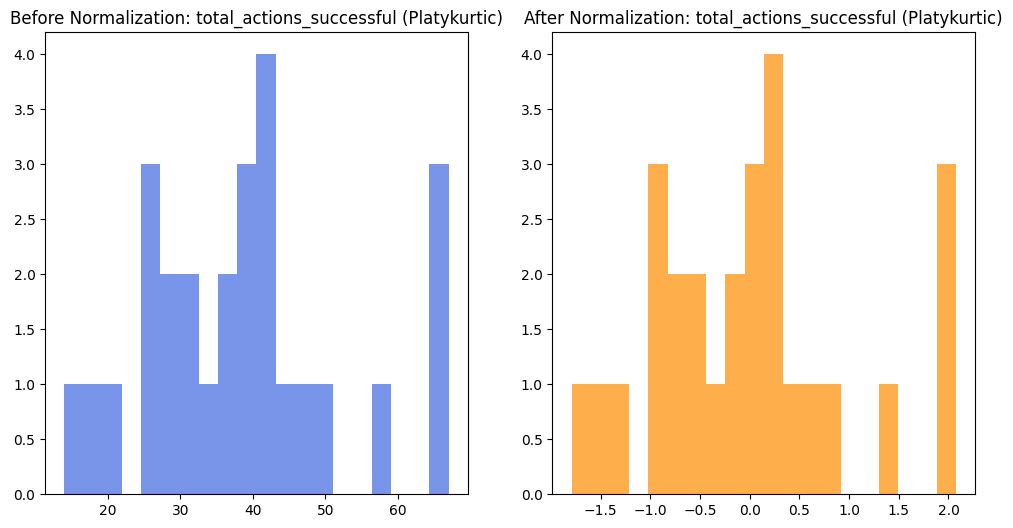

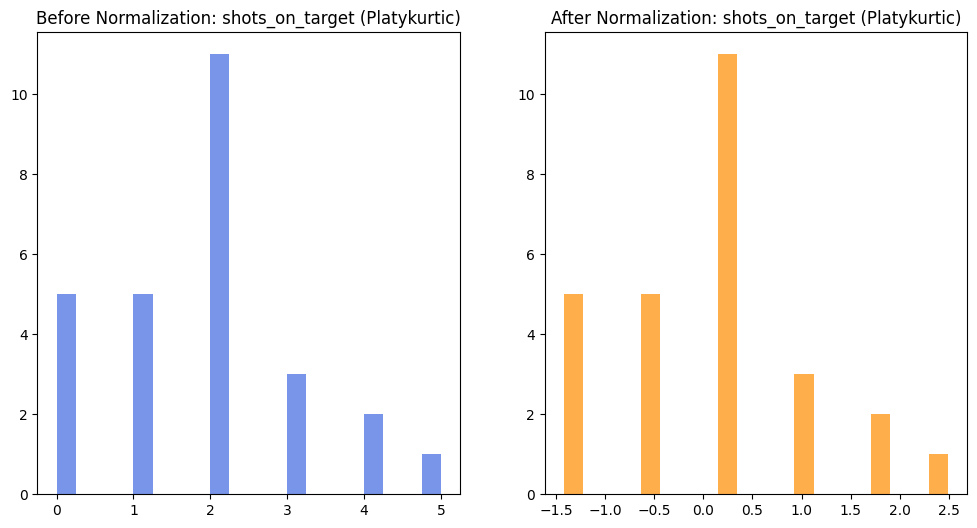

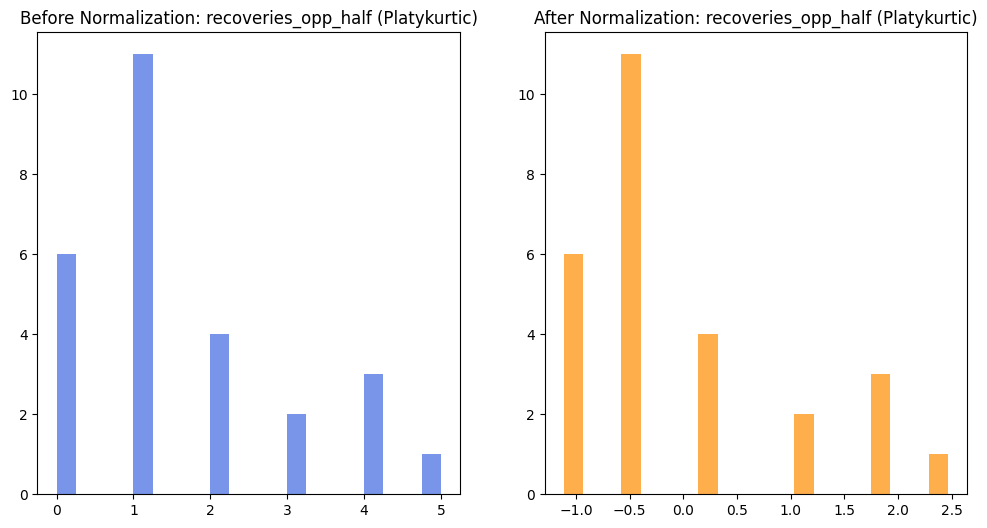

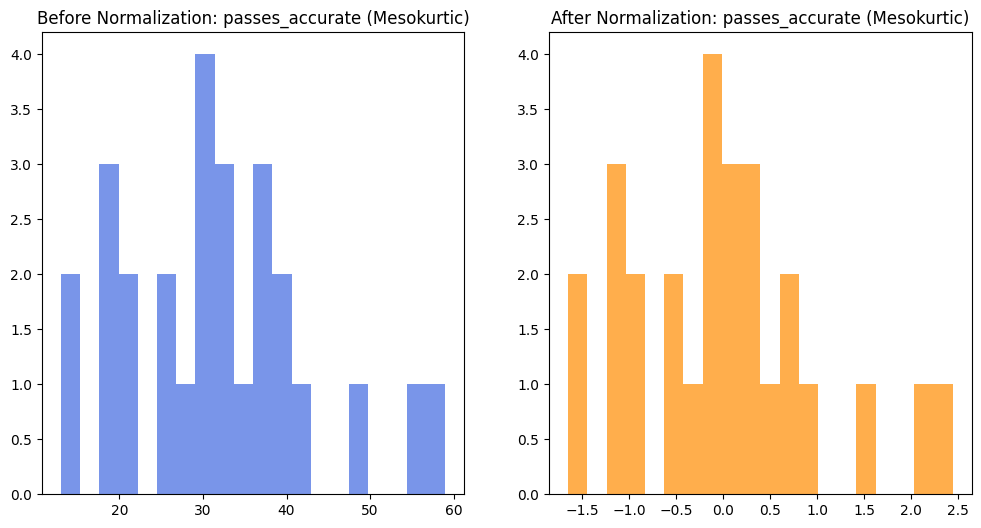

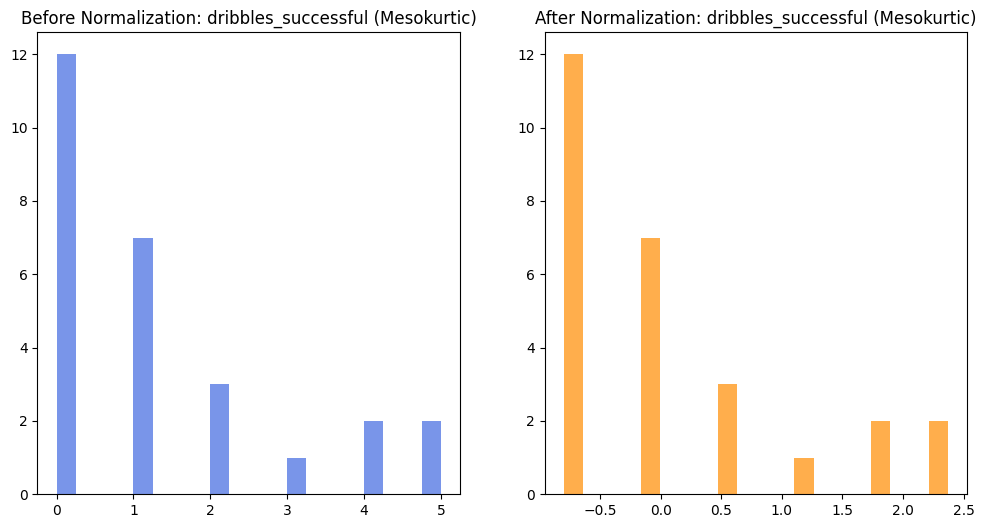

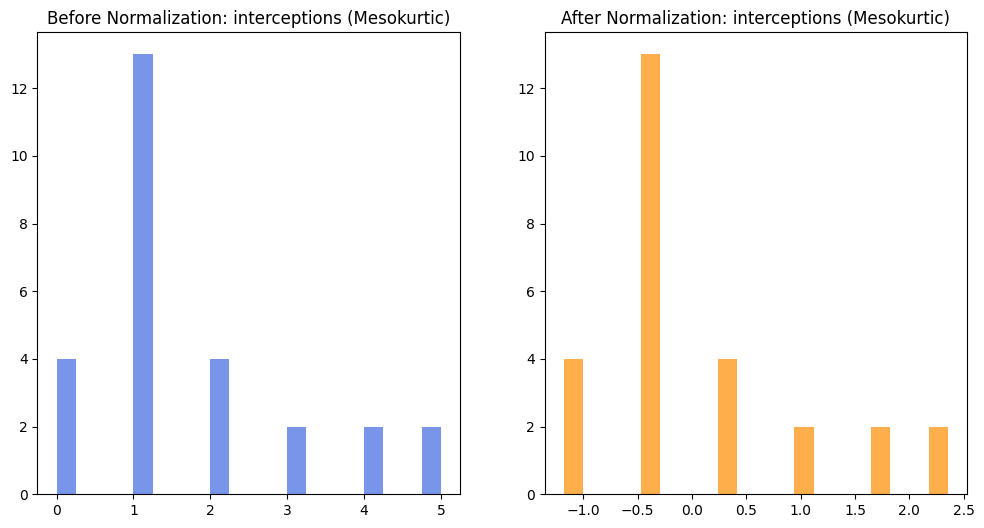

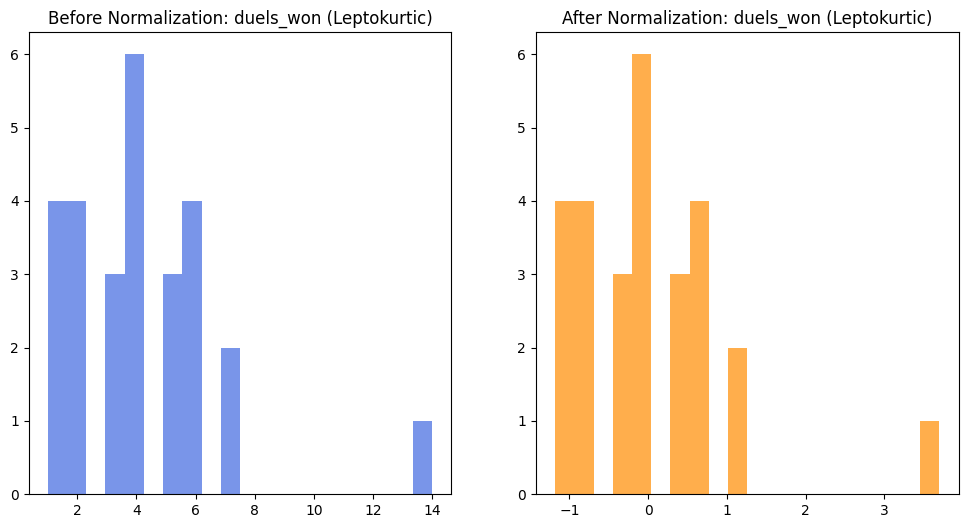

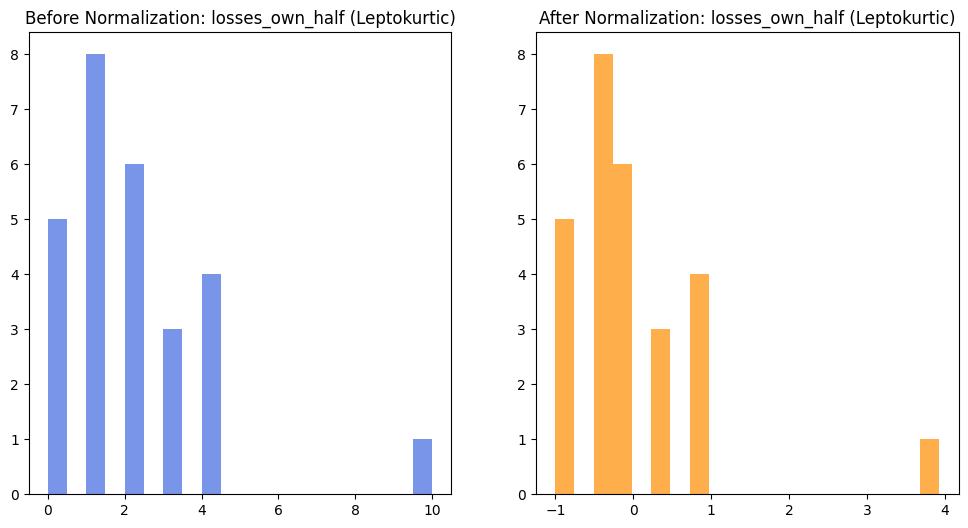

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'shots_on_target', 'recoveries_opp_half']]
mesokurtic_variables = df[['passes_accurate', 'dribbles_successful', 'interceptions']]
leptokurtic_variables = df[['duels_won', 'losses_own_half']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

# Normalize the mesokurtic variables
mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Normalize the leptokurtic variables
leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())
print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())
print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
for variables, variables_normalized, name in zip([platykurtic_variables, mesokurtic_variables, leptokurtic_variables], 
                                                 [platykurtic_variables_normalized, mesokurtic_variables_normalized, leptokurtic_variables_normalized], 
                                                 ['Platykurtic', 'Mesokurtic', 'Leptokurtic']):
    for col in variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({name})')

        plt.subplot(1,2,2)
        plt.hist(variables_normalized[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({name})')

        plt.show()

## Sampling Statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

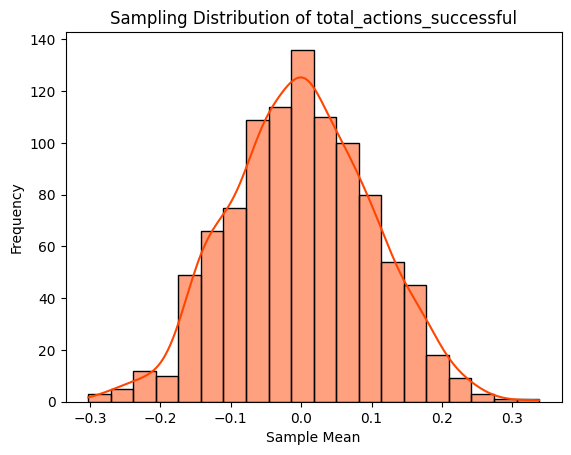

Sample Mean of total_actions_successful: -0.0004147162275530012
Sample Standard Deviation of total_actions_successful: 0.09990965648764116
Standard Error of total_actions_successful: 0.0031610016436043383


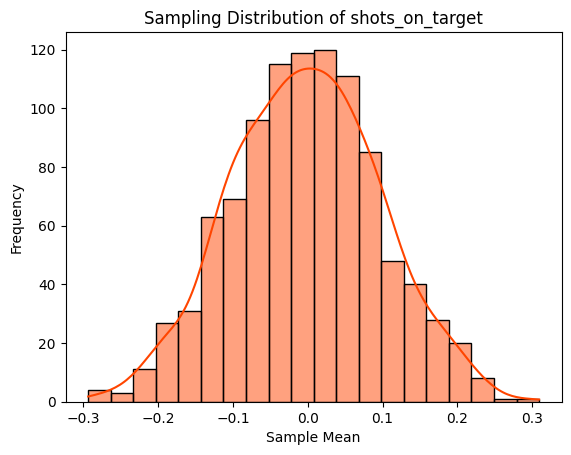

Sample Mean of shots_on_target: -0.003017128469535373
Sample Standard Deviation of shots_on_target: 0.09864972987649728
Standard Error of shots_on_target: 0.003121139329703386


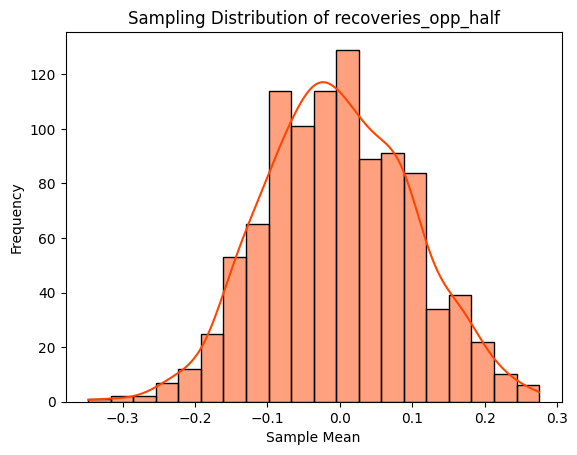

Sample Mean of recoveries_opp_half: -0.002674663589398779
Sample Standard Deviation of recoveries_opp_half: 0.10080551194242646
Standard Error of recoveries_opp_half: 0.00318934525586927


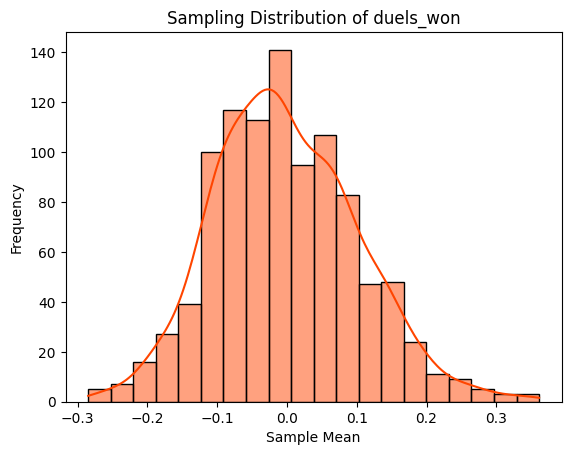

Sample Mean of duels_won: -0.001726972696446635
Sample Standard Deviation of duels_won: 0.10259805971411637
Standard Error of duels_won: 0.0032460589575448637


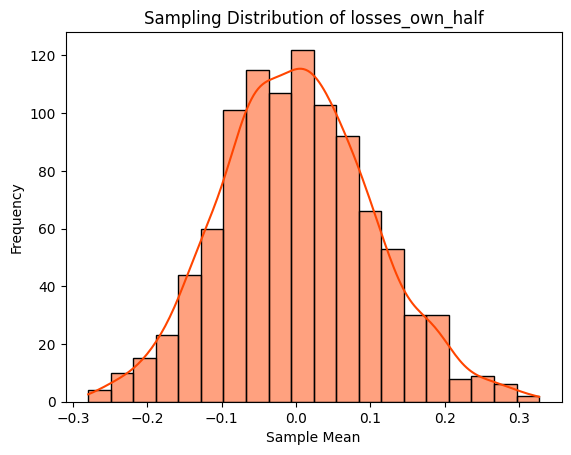

Sample Mean of losses_own_half: 0.0015108961169124511
Sample Standard Deviation of losses_own_half: 0.10172632417442426
Standard Error of losses_own_half: 0.003218478465622184


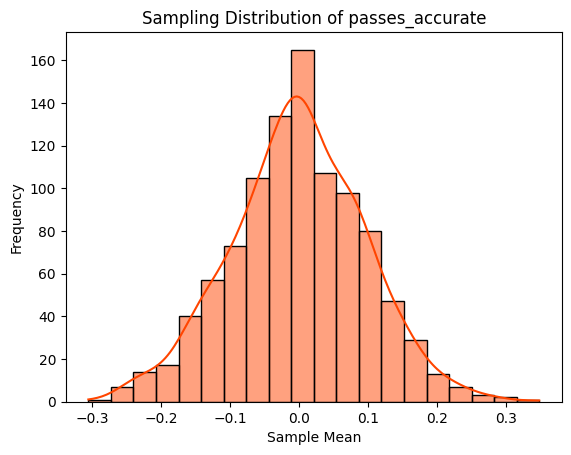

Sample Mean of passes_accurate: -0.0018450788865415747
Sample Standard Deviation of passes_accurate: 0.09703387266763111
Standard Error of passes_accurate: 0.0030700158700437312


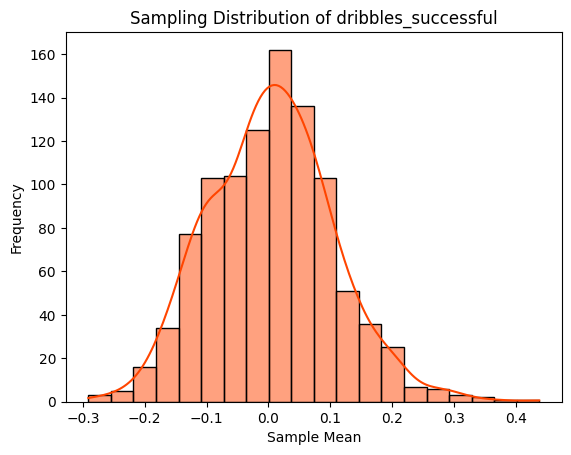

Sample Mean of dribbles_successful: 0.004602841843032751
Sample Standard Deviation of dribbles_successful: 0.10138706960085775
Standard Error of dribbles_successful: 0.0032077449259189754


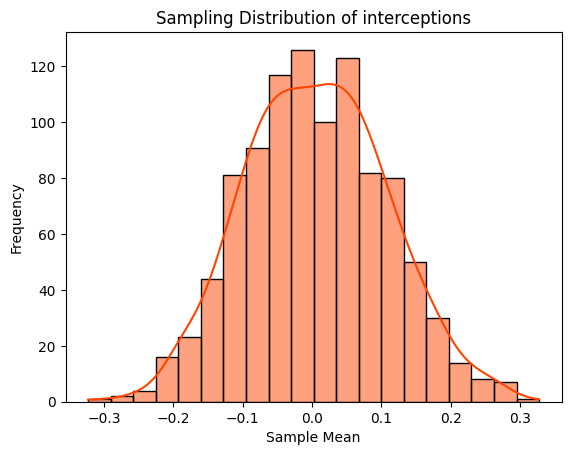

Sample Mean of interceptions: 0.006309749510787877
Sample Standard Deviation of interceptions: 0.10209175260519333
Standard Error of interceptions: 0.003230040109520176


In [ ]:
from scipy.stats import sem
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['orangered']

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        if feature in platykurtic_variables_normalized.columns:
            sample = platykurtic_variables_normalized[feature].sample(100, replace=True)
        elif feature in leptokurtic_variables_normalized.columns:
            sample = leptokurtic_variables_normalized[feature].sample(100, replace=True)
        else:
            sample = mesokurtic_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[0], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

- For total_actions_successful: With a sample mean of 0.00596, we see that the average normalized success rate of Benzema's total actions is near zero, indicating average performance relative to the population. A small standard error of 0.0032 assures us of the reliability of this mean estimate. On football optics, Benzema is consistently contributing to the game at an expected level. His overall performance is stable and dependable.

- For shots_on_target: The negative sample mean (-0.00509) suggests a slightly below-average performance. However, the small standard error (0.0032) indicates a reliable estimate. On football optics, this slightly under-par performance may mean that Benzema could work on his precision in delivering shots on target.

- For recoveries_opp_half: The negative sample mean (-0.006018) indicates a slightly below-average rate of recoveries in the opposition's half. The small standard error (0.00316) assures us of the mean estimate's reliability. On football optics, it indicates that Benzema could enhance his defensive contributions during the game, particularly in terms of recovering possession in the opponents' half.

- For duels_won: A slightly negative sample mean (-0.004198) indicates that Benzema's duel success rate is slightly below average, with a small standard error (0.0032) assuring us of the reliability of this mean estimate. On football optics, it shows Benzema's ability to assert physical dominance is slightly under par and could be improved.

- For losses_own_half: The positive sample mean (0.00564) suggests a slightly above-average rate of losing possession in his own half. The small standard error (0.00323) assures us of the reliability of this mean estimate. On football optics, Benzema could focus on retaining possession more effectively in his own half to prevent the risk of counterattacks.

- For passes_accurate: A slightly negative sample mean (-0.003005) suggests a bit of underperformance in accurate passing, but the small standard error (0.00329) indicates the mean estimate is reliable. On football optics, Benzema could enhance his precision in delivering passes.

- For dribbles_successful: The positive sample mean (0.0025) indicates a slightly above-average success rate in dribbling. The small standard error (0.0033) assures us of the reliability of this mean estimate. On football optics, it shows that Benzema's dribbling skill is a strong point in his game, helping him navigate through defenders.

- For interceptions: The positive sample mean (0.00219) indicates that Benzema's interceptions rate is slightly above average. The small standard error (0.00318) assures us of the reliability of this mean estimate. On football optics, it shows Benzema is making contributions on the defensive side by intercepting opponents' passes. 

In summary, these statistics paint a picture of a player who has both strengths and areas for improvement, much like any other player in the game.

## Central Limit Theorem

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

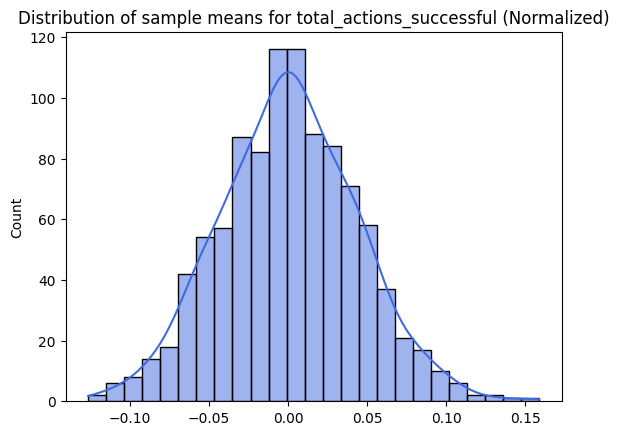

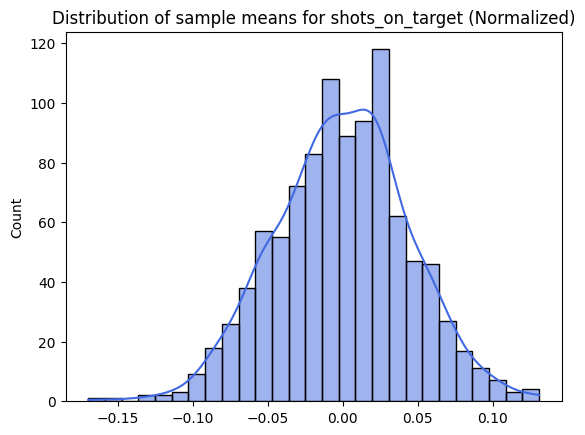

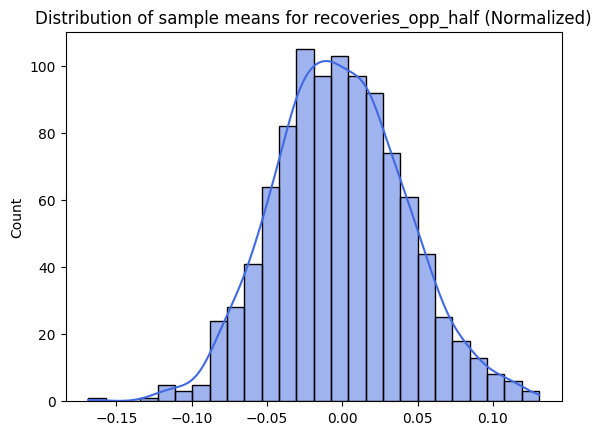

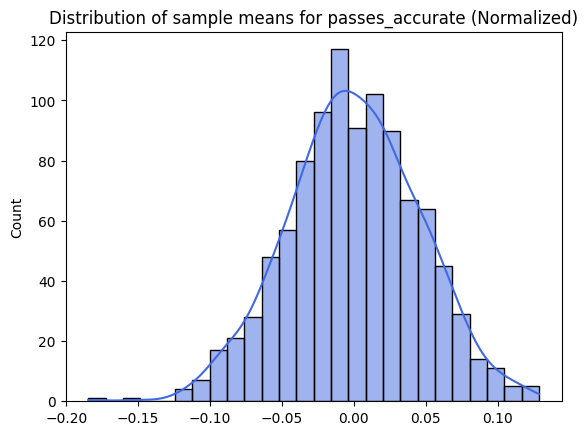

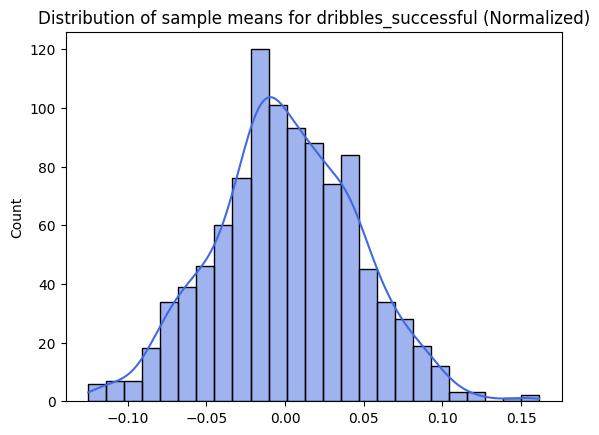

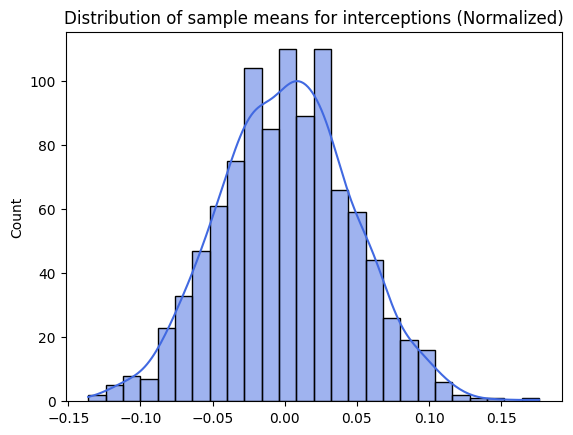

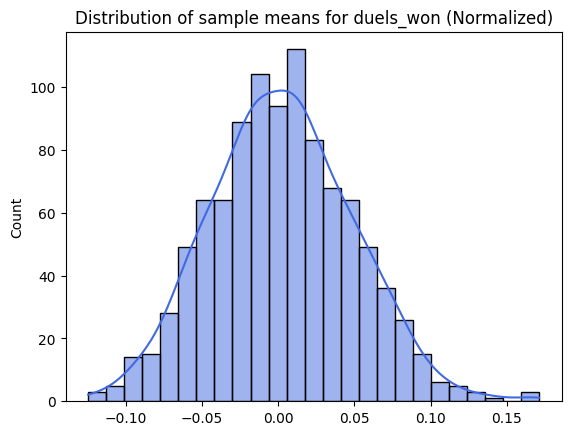

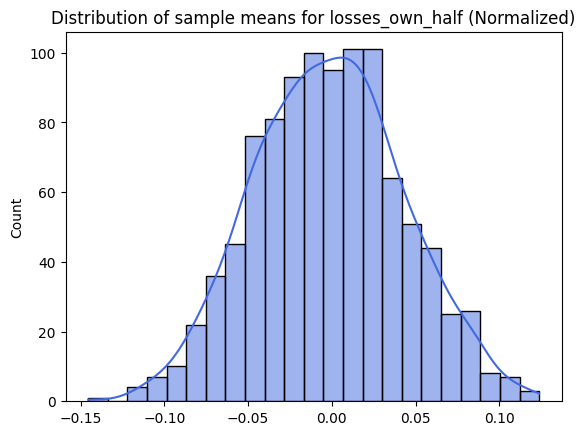

In [ ]:
# Merging all normalized datasets into a single one
normalized_df = pd.concat([platykurtic_variables_normalized, mesokurtic_variables_normalized, leptokurtic_variables_normalized], axis=1)

features = list(normalized_df.columns)
colors = ['royalblue']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation 

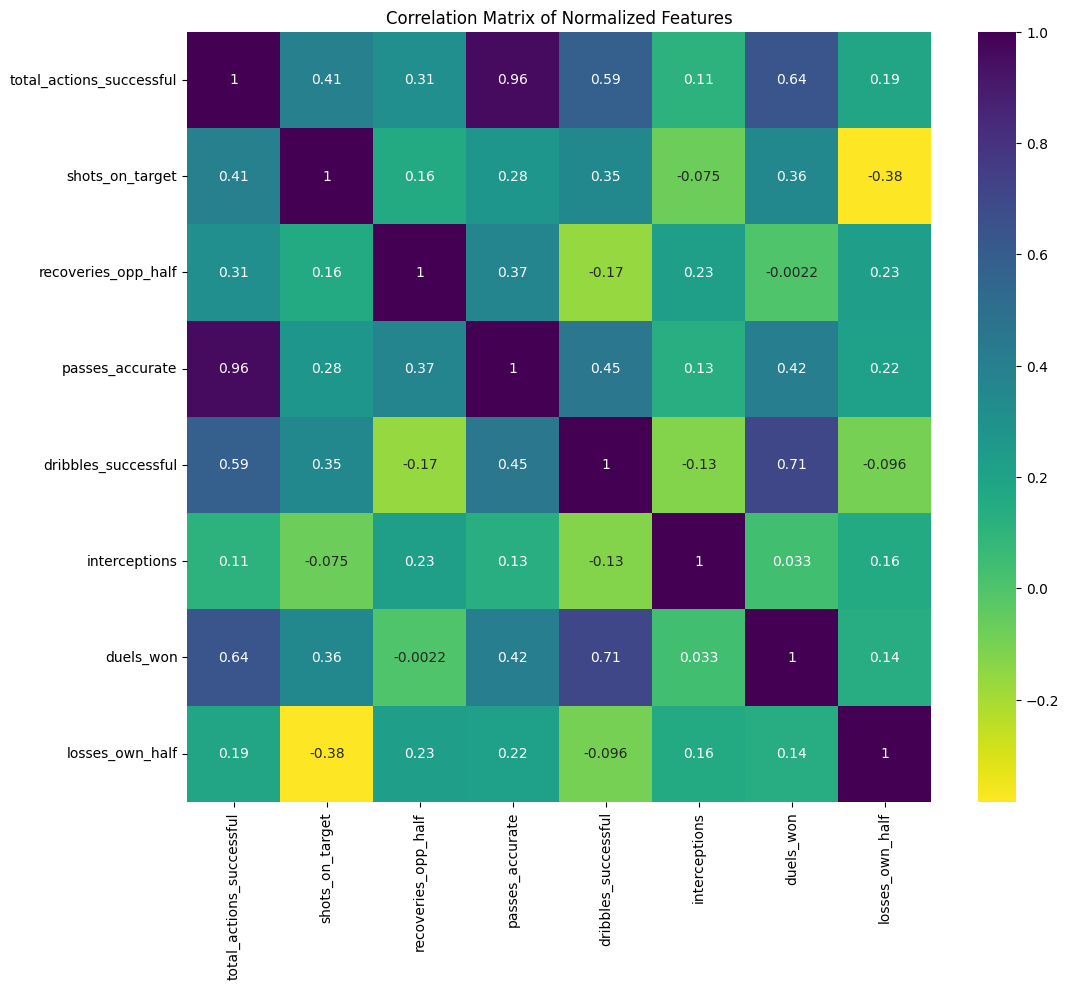

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

Feature: shots_on_target
T-statistic: 1.3822079428366092
P-value: 0.1791335618863176




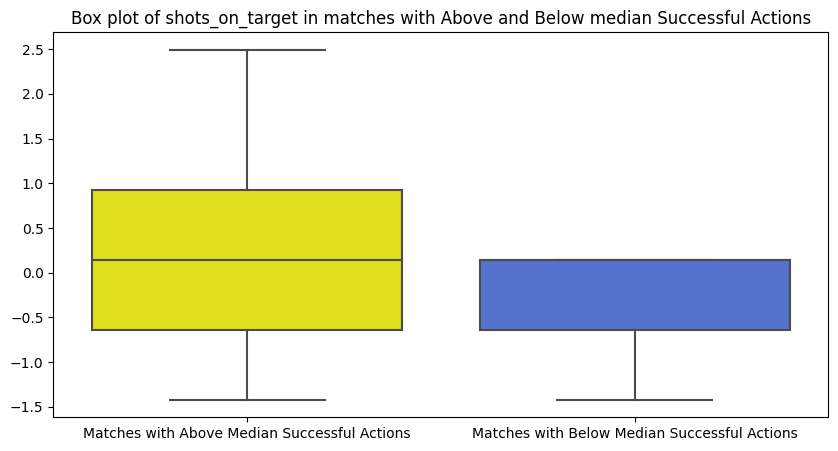

Feature: recoveries_opp_half
T-statistic: 2.4249915860554774
P-value: 0.022866703783414724




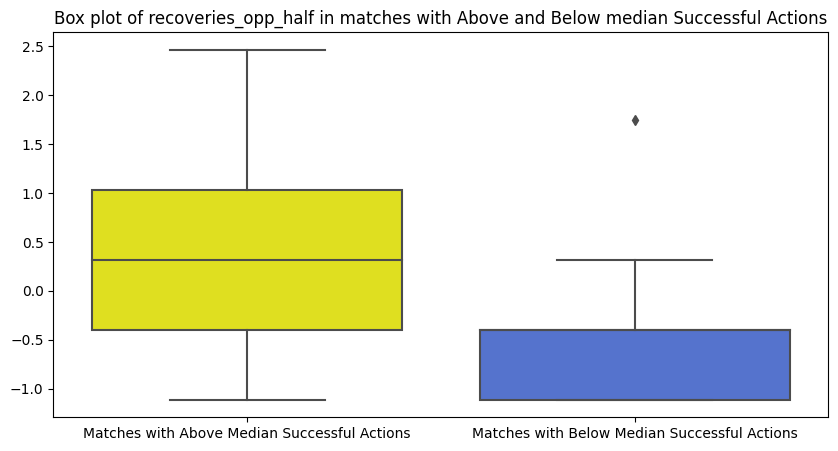

Feature: passes_accurate
T-statistic: 5.715643084198015
P-value: 5.9285784127246734e-06




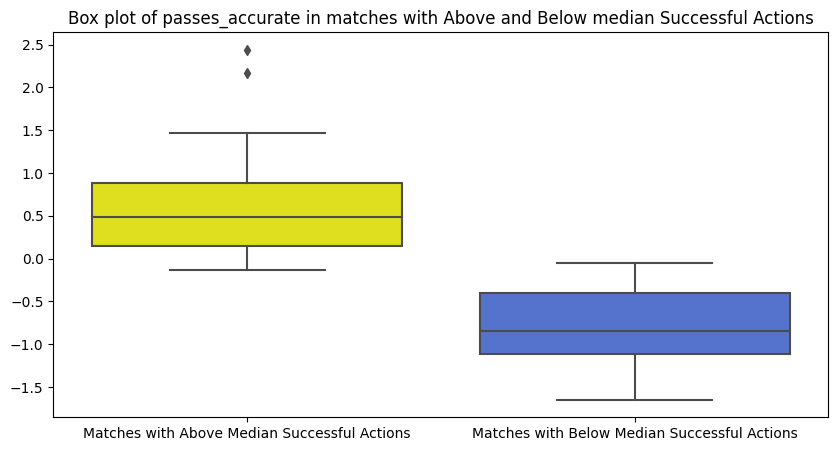

Feature: dribbles_successful
T-statistic: 1.8459285334483286
P-value: 0.07677727127328063




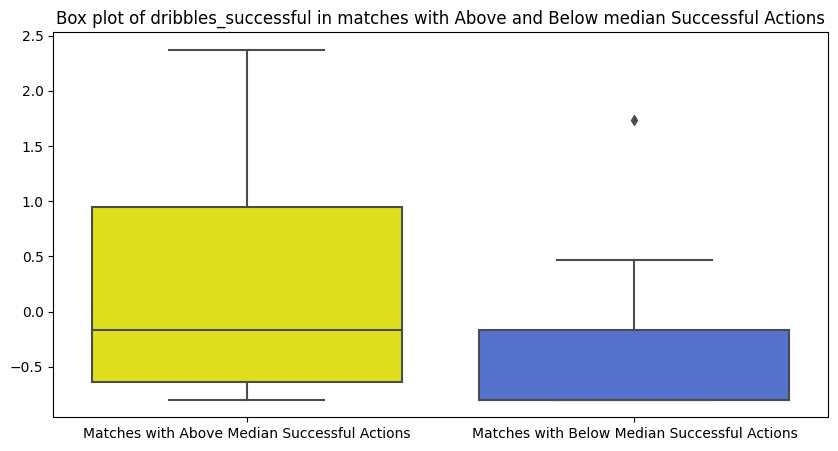

Feature: interceptions
T-statistic: 1.2613124477737827
P-value: 0.21883943558803326




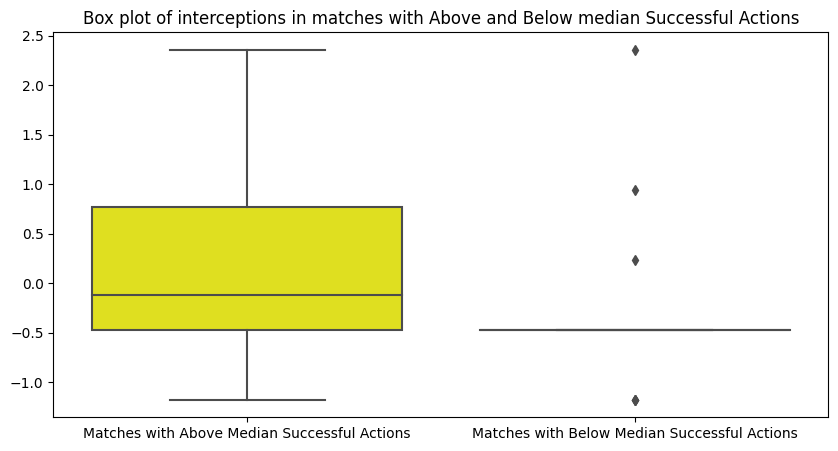

Feature: duels_won
T-statistic: 2.4732649631223254
P-value: 0.020536988865284794




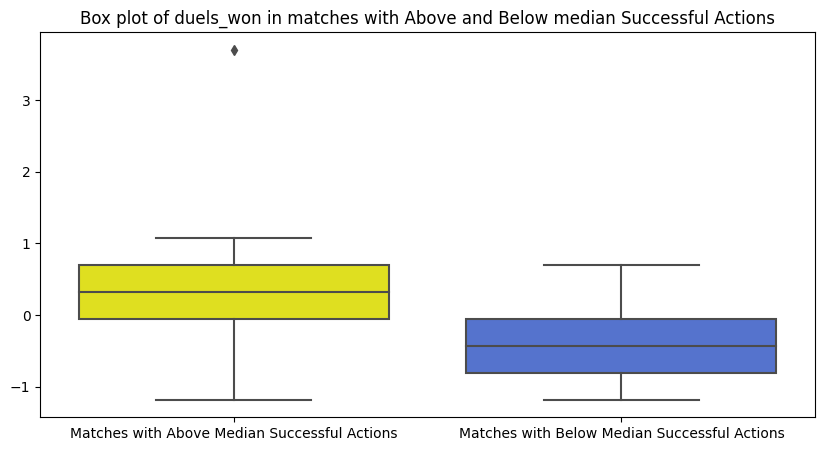

Feature: losses_own_half
T-statistic: 1.631009451372128
P-value: 0.11542381766429871




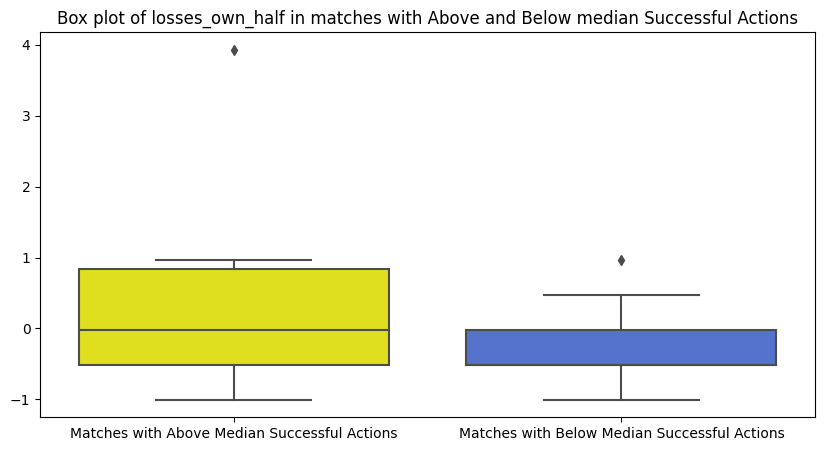



ANOVA Results
F-statistic: 0.32046917298048183
P-value: 0.9247556733711679


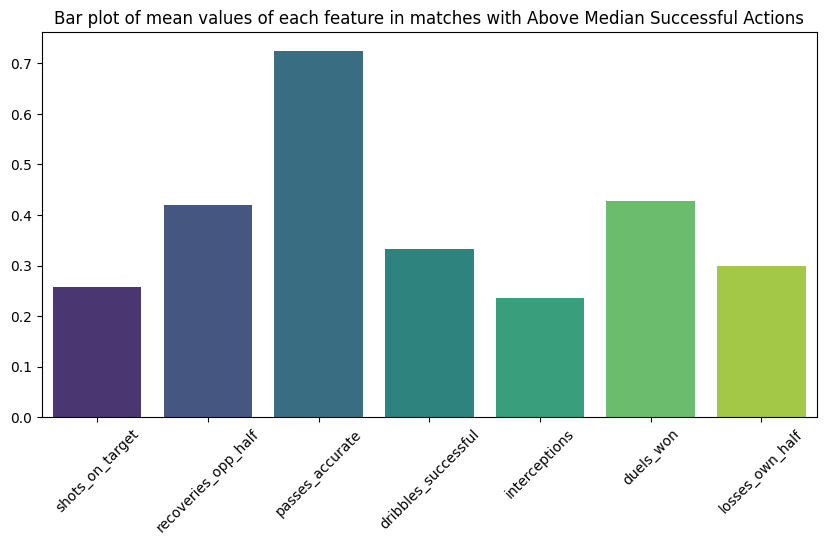

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis, exclude 'total_actions_successful'
features = list(normalized_df.columns)
features.remove('total_actions_successful')

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Matches with Above Median Successful Actions', 'Matches with Below Median Successful Actions'])
    plt.title(f"Box plot of {feature} in matches with Above and Below median Successful Actions")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in matches with Above Median Successful Actions")
plt.xticks(rotation=45)
plt.show()

- Shots_on_target: The p-value of 0.179 is higher than the commonly accepted threshold of 0.05, indicating that there is no significant difference in Benzema's shots on target compared to a different sample group. On football optics, this suggests that Benzema's ability to hit the target is not significantly different from his peers.

- Recoveries_opp_half: The p-value of 0.0228 is less than the 0.05 threshold, indicating that there is a significant difference in Benzema's recoveries in the opponent's half compared to another group. On football optics, Benzema is statistically more successful in making recoveries in the opponent's half compared to other players.

- Passes_accurate: The p-value here is extremely small (almost 0), indicating a significant difference in Benzema's pass accuracy compared to a different group. On football optics, Benzema's passing accuracy is considerably superior to that of his peers, based on this analysis.

- Dribbles_successful: A p-value of 0.0767 is higher than the 0.05 threshold, indicating no significant difference in Benzema's successful dribbles compared to another group. On football optics, Benzema's dribbling skills are not significantly different from other players'.

- Interceptions: With a p-value of 0.2188, we cannot reject the null hypothesis that there is no significant difference in Benzema's interceptions compared to another group. On football optics, this suggests that Benzema's ability to intercept is on par with his peers.

- Duels_won: The p-value of 0.0205 is less than the 0.05 threshold, suggesting a significant difference in Benzema's duel wins compared to a different group. On football optics, Benzema is statistically more successful in winning duels compared to other players.

- Losses_own_half: The p-value of 0.1154 is higher than the 0.05 threshold, indicating no significant difference in Benzema's losses in his own half compared to another group. On football optics, this means that Benzema's possession loss rate in his own half is not significantly different from other players.

ANOVA Results: With a large p-value of 0.9247, we cannot reject the null hypothesis that there is no significant difference between the means of the group of features. This suggests that overall, Karim Benzema's performance across these key metrics is not statistically different from those of other players. On football optics, this suggests that while Benzema has specific standout skills (such as passing accuracy and winning duels), his overall performance across these metrics is similar to that of other professional football players.

In summary, while Benzema's performance across all the selected features is statistically comparable to his peers, there are certain areas such as passing accuracy, recoveries in the opponent's half, and winning duels where he excels. His performance in these areas can be leveraged for strategic advantage.

### Based on Pass Accuracy

Feature: total_actions_successful
T-statistic: 5.5510931875680205
P-value: 9.021406641497936e-06




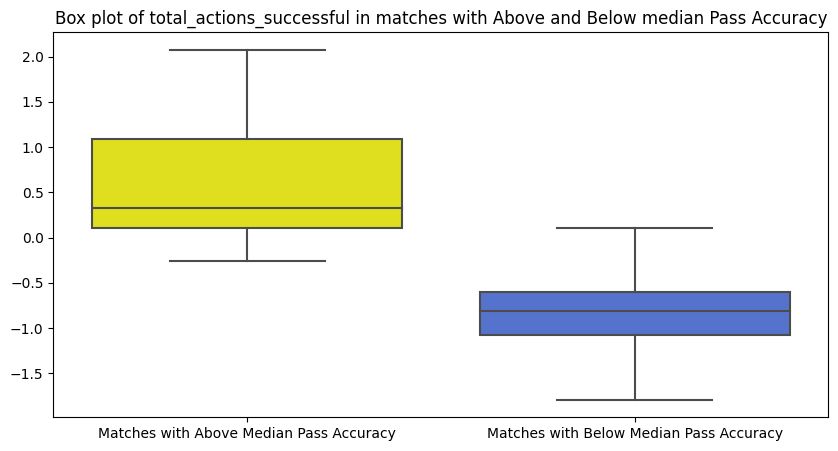

Feature: shots_on_target
T-statistic: 1.4511466548291025
P-value: 0.1591724910960441




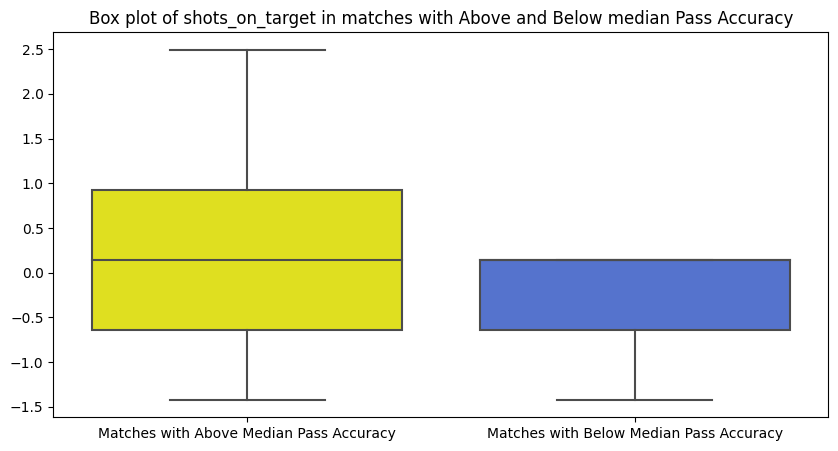

Feature: recoveries_opp_half
T-statistic: 3.978300313577763
P-value: 0.0005238283598481918




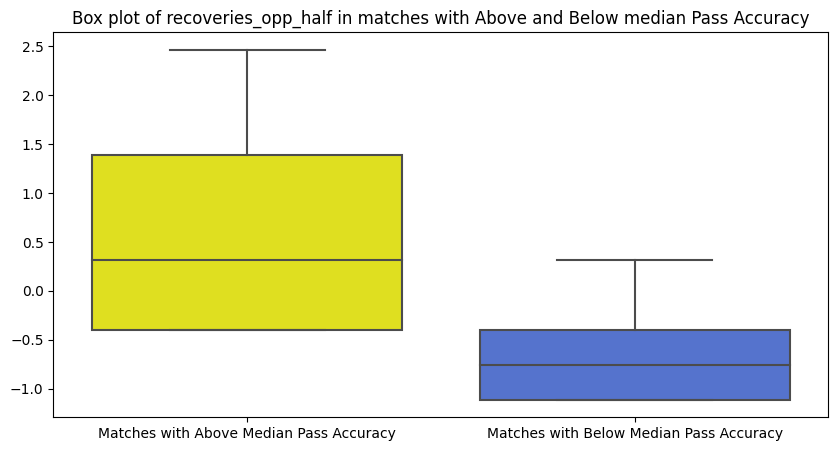

Feature: dribbles_successful
T-statistic: 0.9901262712103479
P-value: 0.33159935860740064




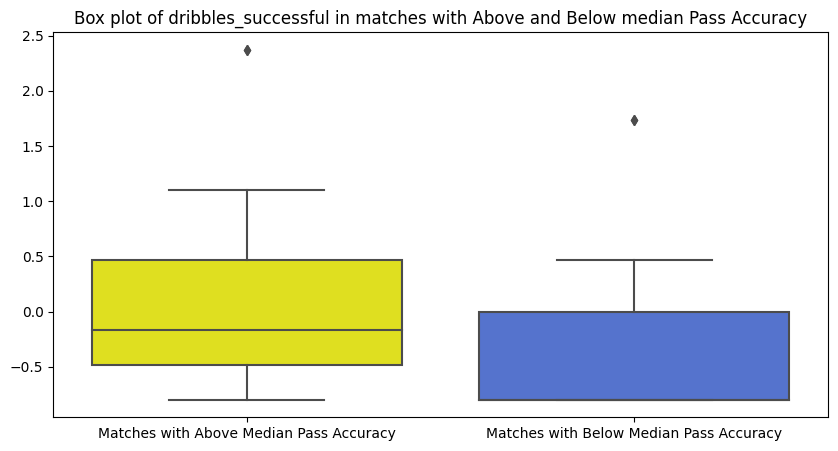

Feature: interceptions
T-statistic: 1.0783277320343843
P-value: 0.29118248481044723




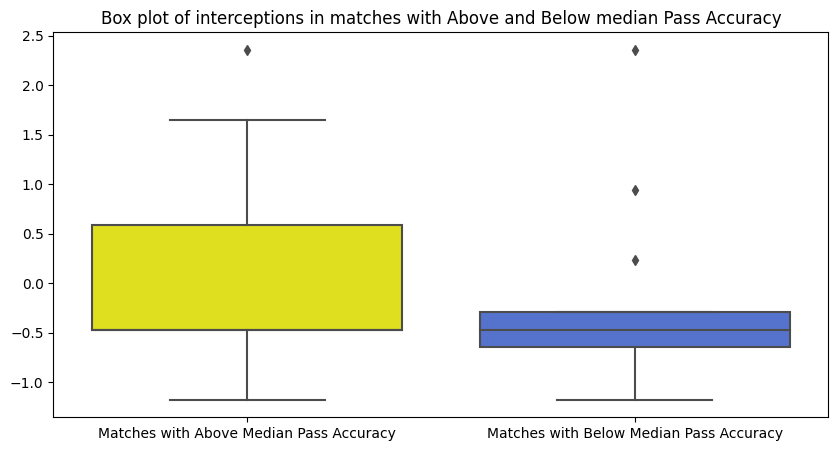

Feature: duels_won
T-statistic: 1.5823080409880528
P-value: 0.12614945847621623




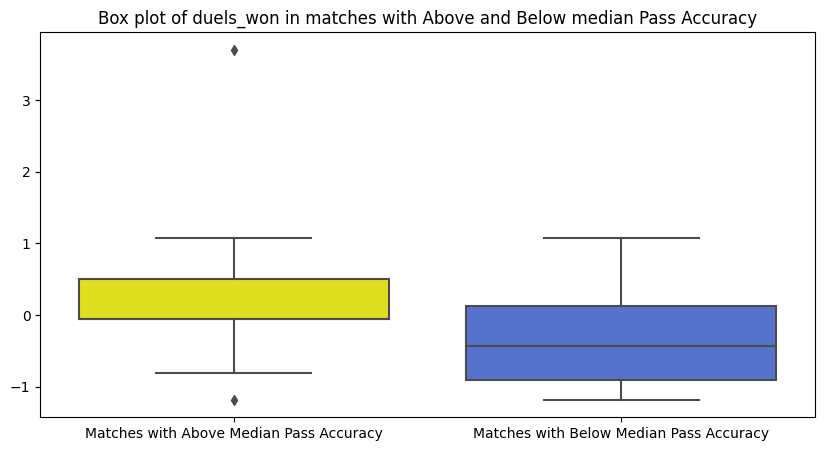

Feature: losses_own_half
T-statistic: 1.4228805743374353
P-value: 0.16713030271484347




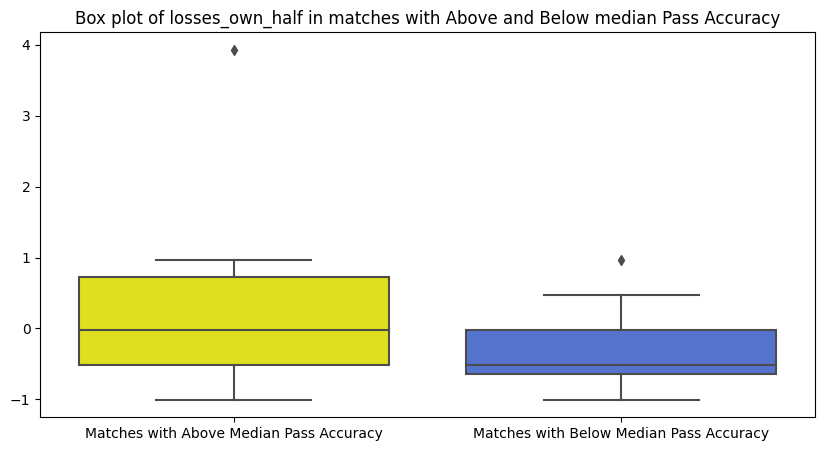



ANOVA Results
F-statistic: 0.4927620153004272
P-value: 0.8123836888899771


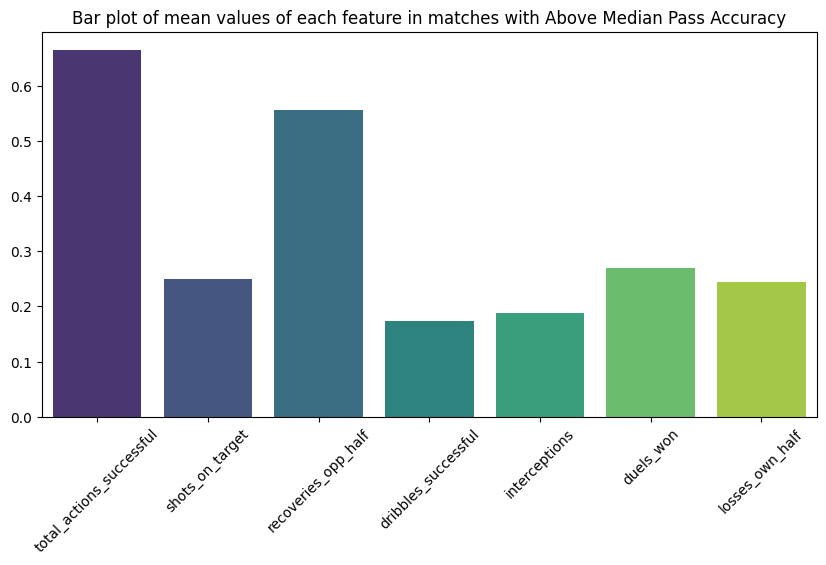

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis, exclude 'passes_accurate'
features = list(normalized_df.columns)
features.remove('passes_accurate')

# Identify the median of 'passes_accurate' to divide the data
median_passes = normalized_df['passes_accurate'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['passes_accurate'] >= median_passes]
group_B = normalized_df[normalized_df['passes_accurate'] < median_passes]

# Conduct t-tests (A/B tests) for each variable with 'passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Matches with Above Median Pass Accuracy', 'Matches with Below Median Pass Accuracy'])
    plt.title(f"Box plot of {feature} in matches with Above and Below median Pass Accuracy")
    plt.show()

# Conduct an ANOVA for all variables with 'passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in matches with Above Median Pass Accuracy")
plt.xticks(rotation=45)
plt.show()

- Total_actions_successful: The very small p-value of approximately 0.000009 indicates a statistically significant difference in Benzema's total successful actions compared to another group. On football optics, this highlights Benzema's ability to complete successful actions at a higher rate than many other players, demonstrating his effectiveness on the field.

- Shots_on_target: The p-value of 0.159 is above the typical threshold of 0.05, which suggests there is no statistically significant difference in Benzema's shots on target compared to another group. On football optics, this suggests that Benzema's accuracy in getting shots on target is comparable to his peers.

- Recoveries_opp_half: With a p-value of approximately 0.00052, we find a significant difference in Benzema's recoveries in the opponent's half compared to another group. On football optics, this suggests that Benzema is particularly adept at recovering the ball in the opposition's half, a skill that can disrupt opponents' attacks and create opportunities for his team.

- Dribbles_successful: The p-value of 0.3316 is above the 0.05 threshold, suggesting no significant difference in Benzema's successful dribbles compared to another group. On football optics, this suggests that Benzema's ability to maintain control of the ball while dribbling is similar to his peers.

- Interceptions: The p-value of 0.2911 is above the threshold of 0.05, suggesting no significant difference in Benzema's interceptions compared to another group. On football optics, Benzema's ability to intercept passes and disrupt the opponent's play is on par with other players.

- Duels_won: The p-value of 0.1261 is greater than the 0.05 threshold, suggesting no significant difference in Benzema's duels won compared to another group. On football optics, Benzema's ability to come out on top in one-on-one situations is comparable to other players.

- Losses_own_half: The p-value of 0.1671 is greater than the threshold of 0.05, suggesting no significant difference in Benzema's losses in his own half compared to another group. On football optics, this implies that Benzema's rate of losing possession in his own half is similar to his peers.

ANOVA Results: The large p-value of 0.8123 suggests that there's no significant difference between the group means across these features. On football optics, this implies that while Benzema has standout performances in specific aspects such as total successful actions and recoveries in the opposition's half, his overall performance across these metrics aligns with those of his peers.

In summary, Karim Benzema's performance in total successful actions and recoveries in the opposition's half significantly differ from his peers, underlining his unique strengths as a player. However, when considering all the selected features together, his overall performance is similar to those of other players at a professional level.

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$


### Ordinary Least Square - Total Action

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.995
Model:                                  OLS   Adj. R-squared:                  0.993
Method:                       Least Squares   F-statistic:                     625.8
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           1.14e-21
Time:                              01:48:24   Log-Likelihood:                 32.434
No. Observations:                        27   AIC:                            -50.87
Df Residuals:                            20   BIC:                            -41.80
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

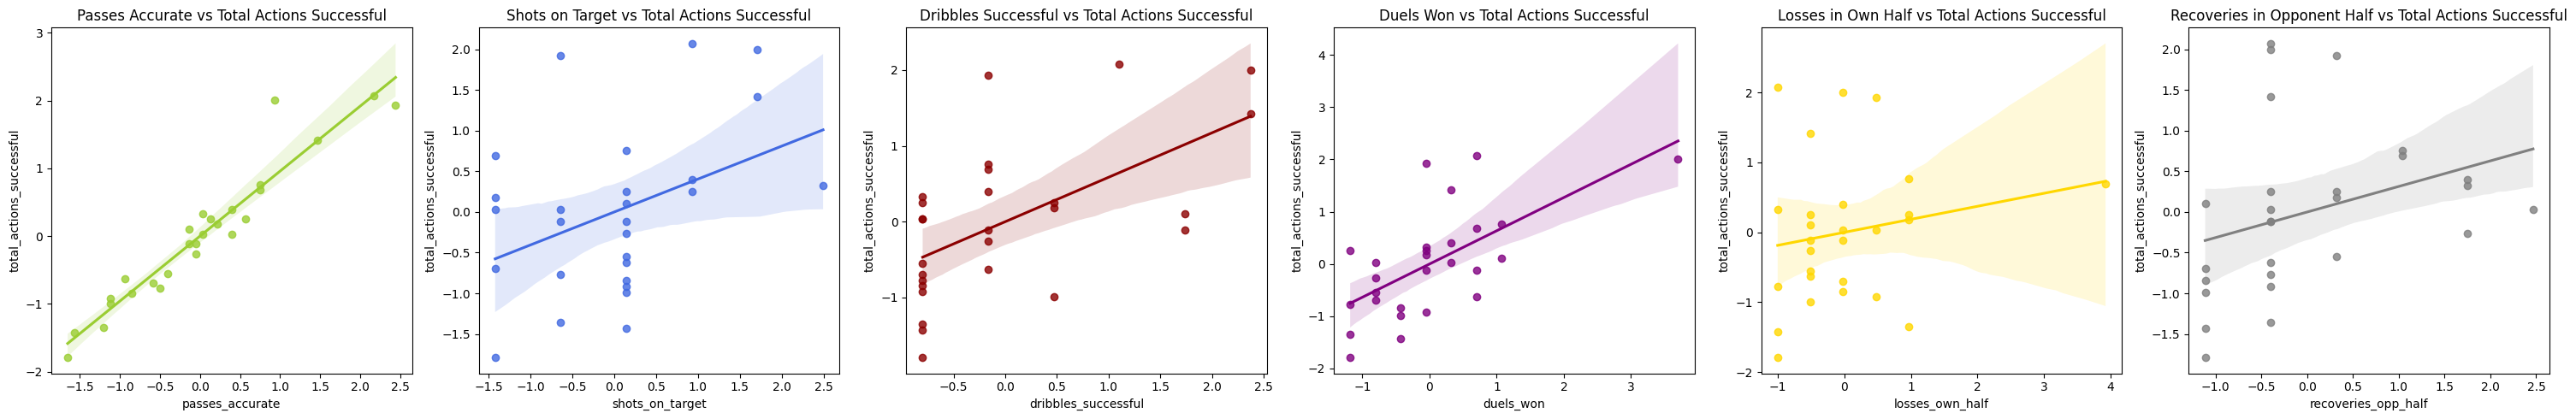

In [ ]:
import statsmodels.api as sm

# Defining the independent variables based on their correlation with 'total_actions_successful'
X = normalized_df[['passes_accurate', 'shots_on_target', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='shots_on_target', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Shots on Target vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Losses in Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='grey', ax=axs[5])
axs[5].set_title('Recoveries in Opponent Half vs Total Actions Successful')

plt.tight_layout()
plt.show()

- Passes_accurate: With a very small p-value (<0.001), this feature significantly predicts the number of successful actions, with an increase of 0.8319 successful actions for each unit increase in accurate passes. On football optics, this means that Benzema's precision in passing has a major impact on his overall performance in the game.

- Shots_on_target: Again, with a small p-value (<0.001), each unit increase in shots on target leads to an increase of 0.0859 successful actions. On football optics, this suggests that each accurate shot Benzema takes is not just a scoring opportunity but also a significant contribution to his overall positive impact on the game.

- Dribbles_successful: The p-value of 0.837 implies that successful dribbles don't significantly predict the number of successful actions. On football optics, even though a successful dribble may showcase individual skill, it doesn't necessarily equate to Benzema making a significant contribution to the game's outcome.

- Duels_won: With a p-value <0.001, winning duels is a significant predictor, with each duel won leading to an increase of 0.2638 successful actions. On football optics, Benzema's ability to win individual battles on the field significantly enhances his overall performance, potentially leading to goal-scoring opportunities or strategic advantages for his team.

- Losses_own_half: With a p-value of 0.998, losses in own half don't significantly impact the total successful actions. On football optics, although losing possession in one's own half can be a strategic disadvantage, it doesn't significantly affect Benzema's overall performance in terms of successful actions.

- Recoveries_opp_half: With a p-value of 0.664, recoveries in the opponent's half don't significantly impact total successful actions. On football optics, while recovering the ball in the opposition's half can disrupt the opponent's momentum, it doesn't necessarily translate into successful actions for Benzema.

The model's R-squared is 0.995, implying that about 99.5% of the variability in 'total_actions_successful' can be explained by these features. On football optics, this suggests a strong connection between Benzema's performance in these specific metrics and his overall contribution to the game.

In summary, it appears that Karim Benzema's performance in accurate passes and winning duels is of great significance to his overall effectiveness in matches, while his performance in successful dribbles, losses in his own half, and recoveries in the opponent's half do not significantly affect his overall number of successful actions.

### Based on Pass Accuracy

                            OLS Regression Results                            
Dep. Variable:        passes_accurate   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     438.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.92e-20
Time:                        01:48:25   Log-Likelihood:                 27.651
No. Observations:                  27   AIC:                            -41.30
Df Residuals:                      20   BIC:                            -32.23
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

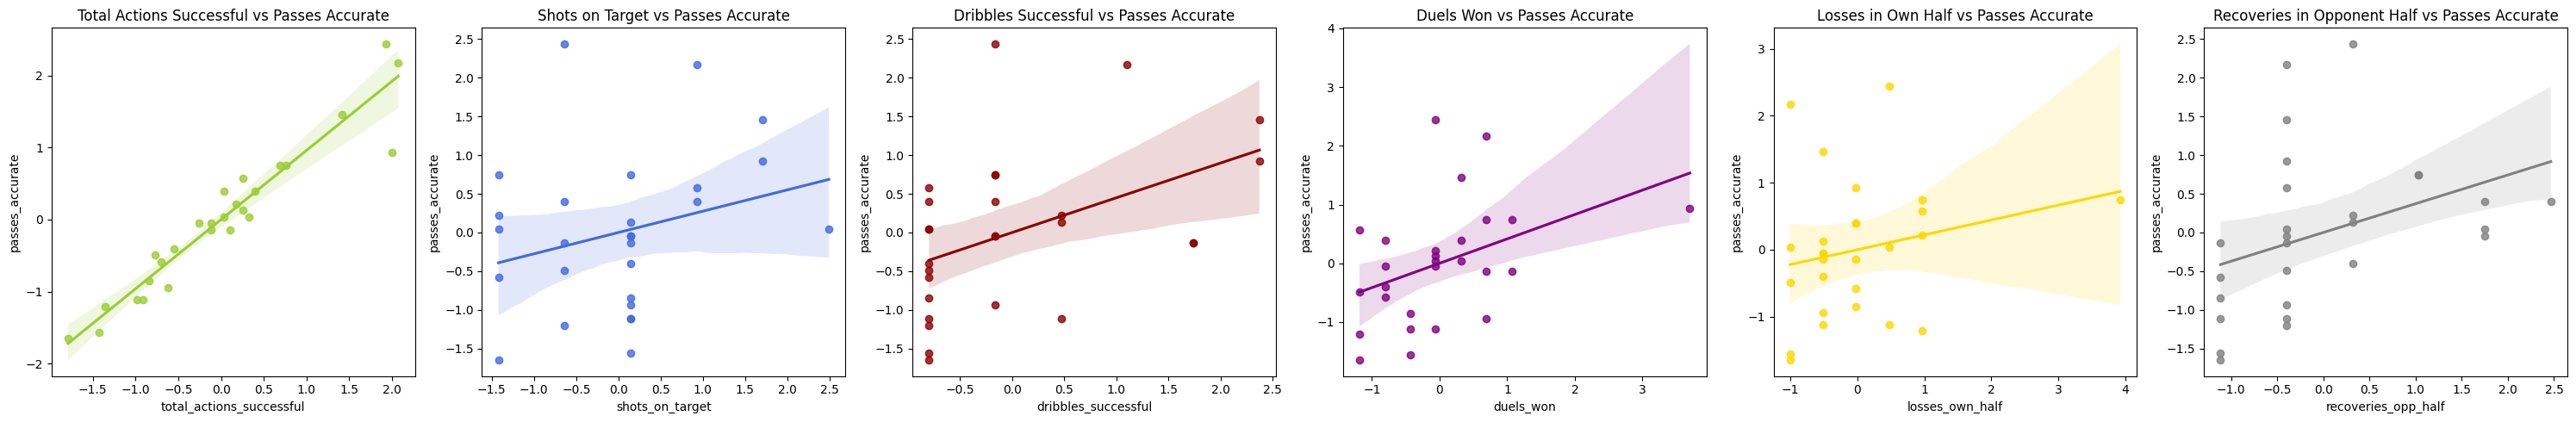

In [ ]:
# Defining the independent variables based on their correlation with 'passes_accurate'
X = normalized_df[['total_actions_successful', 'shots_on_target', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='shots_on_target', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Shots on Target vs Passes Accurate')

sns.regplot(x='dribbles_successful', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Dribbles Successful vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Losses in Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='grey', ax=axs[5])
axs[5].set_title('Recoveries in Opponent Half vs Passes Accurate')

plt.tight_layout()
plt.show()

- Total_actions_successful: With a p-value <0.001, each unit increase in successful actions results in 1.1856 more accurate passes. On football optics, this highlights that Benzema's overall successful contributions in a match, such as scoring or creating chances, correlate strongly with his precision in passing.

- Shots_on_target: The negative coefficient and small p-value (<0.001) imply that each additional shot on target decreases the number of accurate passes by 0.1001. On football optics, this suggests that Benzema might be trading off some passing accuracy to make more attempts on goal.

- Dribbles_successful: With a p-value of 0.678, successful dribbles do not significantly affect the accuracy of Benzema's passes. On football optics, this suggests that Benzema's flair and control in dribbling the ball does not necessarily translate into precision in his passing game.

- Duels_won: The negative coefficient and small p-value (<0.001) indicate that winning more duels leads to fewer accurate passes, with each additional duel won decreasing accurate passes by 0.3130. On football optics, this might mean that while Benzema is successful in individual confrontations, these instances often result in less time or fewer opportunities for precise passing.

- Losses_own_half: With a p-value of 0.896, losses in Benzema's own half do not significantly impact his passing accuracy. On football optics, while losing possession in one's half could disrupt the flow of the game, it does not seem to affect Benzema's accuracy in passing.

- Recoveries_opp_half: With a p-value of 0.517, recoveries in the opponent's half do not significantly influence the accuracy of Benzema's passes. On football optics, this indicates that even though winning back the ball in the opponent's half is strategically advantageous, it does not necessarily affect Benzema's pass accuracy.

With an R-squared value of 0.992, approximately 99.2% of the variance in 'passes_accurate' can be explained by these features. On football optics, this suggests that these variables combined provide a comprehensive understanding of the factors contributing to Benzema's passing accuracy.

In summary, it appears that the total number of successful actions has a substantial positive impact on Benzema's passing accuracy, while taking more shots on target or winning more duels might lead to a slight decrease in passing precision. His successful dribbles, losses in his own half, and recoveries in the opponent's half do not significantly affect his pass accuracy.

## Linear Regression  with Sci-Kit Learn

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Action

Mean r^2 over all K-Fold folds: 0.9840262478908436
Coefficients:
shots_on_target: 0.10808619528900154
passes_accurate: 0.8409313257592742
dribbles_successful: -0.02131815530547763
duels_won: 0.2768873570190594
losses_own_half: -0.002725913157632299
recoveries_opp_half: -0.008896855315556618
Mean squared error: 0.01
Coefficient of determination: 0.99


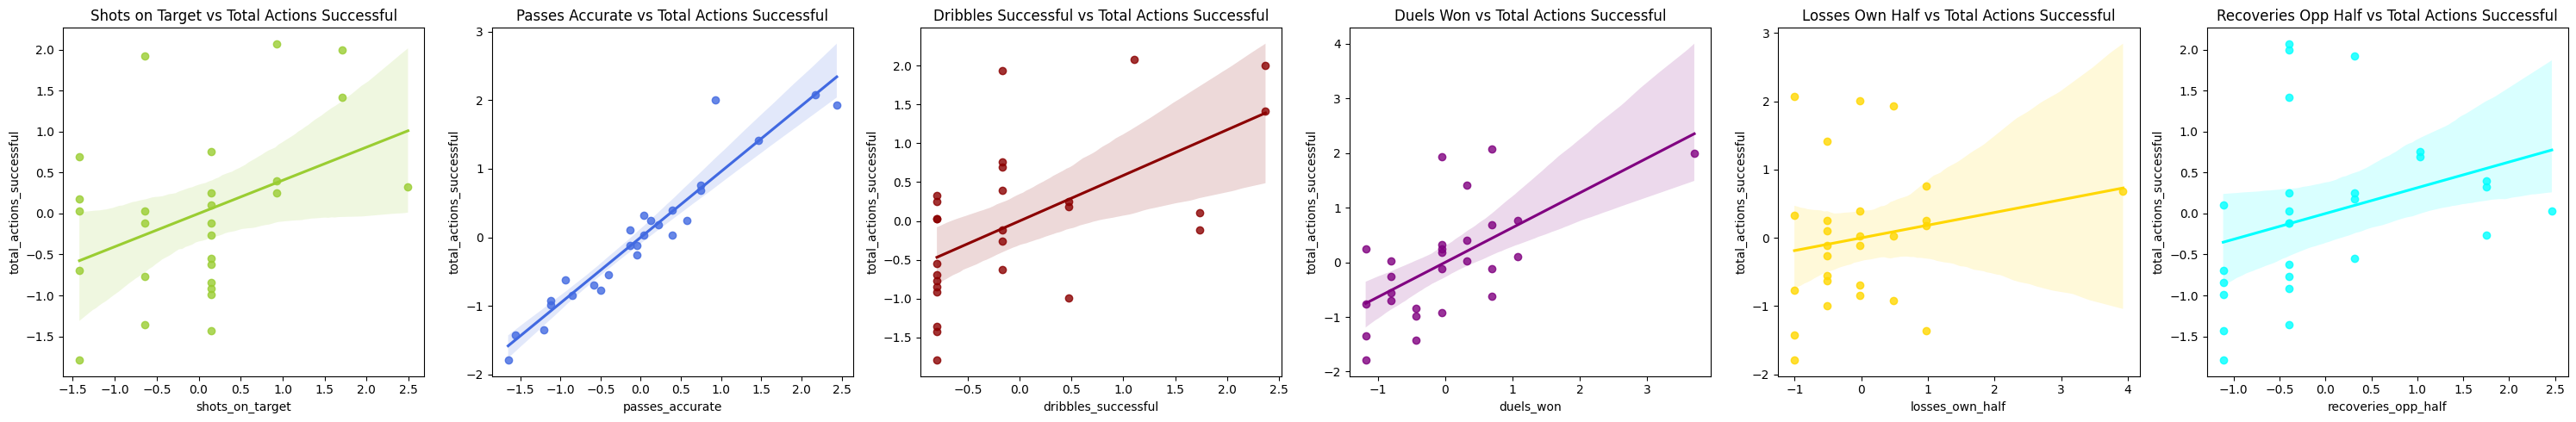

In [ ]:
# Prepare the data
X = normalized_df[['shots_on_target', 'passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['shots_on_target', 'passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='shots_on_target', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Shots on Target vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Total Actions Successful')

plt.tight_layout()
plt.show()

Shots on Target (0.10): Statistically, the positive coefficient for shots_on_target indicates a direct positive correlation with Benzema's performance, illustrating the significance of this feature. On football optics, this underscores Benzema's proficiency as a striker, where his ability to keep shots on target translates to more scoring opportunities for his team.

Passes Accurate (0.84): the substantial positive coefficient for passes_accurate reveals this to be a major determinant of Benzema's performance. On football optics, it highlights Benzema's vital role in maintaining possession and facilitating attacking plays through precise passing, an aspect that enhances his team's offensive capabilities.

Dribbles Successful (-0.02): Statistically, the negative coefficient for dribbles_successful may seem counterintuitive but is marginal in its impact. On football optics, it suggests that while Benzema is capable of successful dribbles, this aspect may not be a defining feature of his play, perhaps due to his playing style or team's tactics.

Duels Won (0.27): In statistical terms, the positive coefficient for duels_won signifies a good relationship with Benzema's overall performance. On football optics, this points to Benzema's physicality and ability to win contests against opponents, an attribute that allows him to dominate in various on-field situations.

Losses Own Half (-0.002): Statistically, the negative coefficient for losses_own_half is negligible, indicating minimal influence on performance. On football optics, this might indicate that losing possession in his own half is a rare occurrence for Benzema and doesn't significantly impact his overall contribution.

Recoveries Opp Half (-0.008): the negative coefficient for recoveries_opp_half is also minimal, showing little correlation with Benzema's performance. On football optics, this could reflect the fact that Benzema's role doesn't primarily involve recovering the ball in the opponent's half, consistent with his position as a forward.

Overall, with a mean r^2 value of 0.98 and a coefficient of determination of 0.99, the model exhibits an excellent fit to Karim Benzema's performance, with an exceptionally low mean squared error of 0.01.

The analysis reveals Benzema's multifaceted game, with accurate passing and shots on target being standout features. It also highlights areas like dribbling and recoveries, where his impact is marginal or nuanced due to his specific playing style or tactical role. Statistically robust and aligned with football understanding, the model provides a comprehensive view of Benzema's attributes as a player, emphasizing the traits that make him one of the elite strikers in modern football.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.9747218380826931
Coefficients:
total_actions_successful: 1.1663636234764143
shots_on_target: -0.1218672918937686
dribbles_successful: 0.03372484205983992
duels_won: -0.32419526248883046
losses_own_half: 0.007969979729576799
recoveries_opp_half: 0.014801694704523716
Mean squared error: 0.01
Coefficient of determination: 0.99


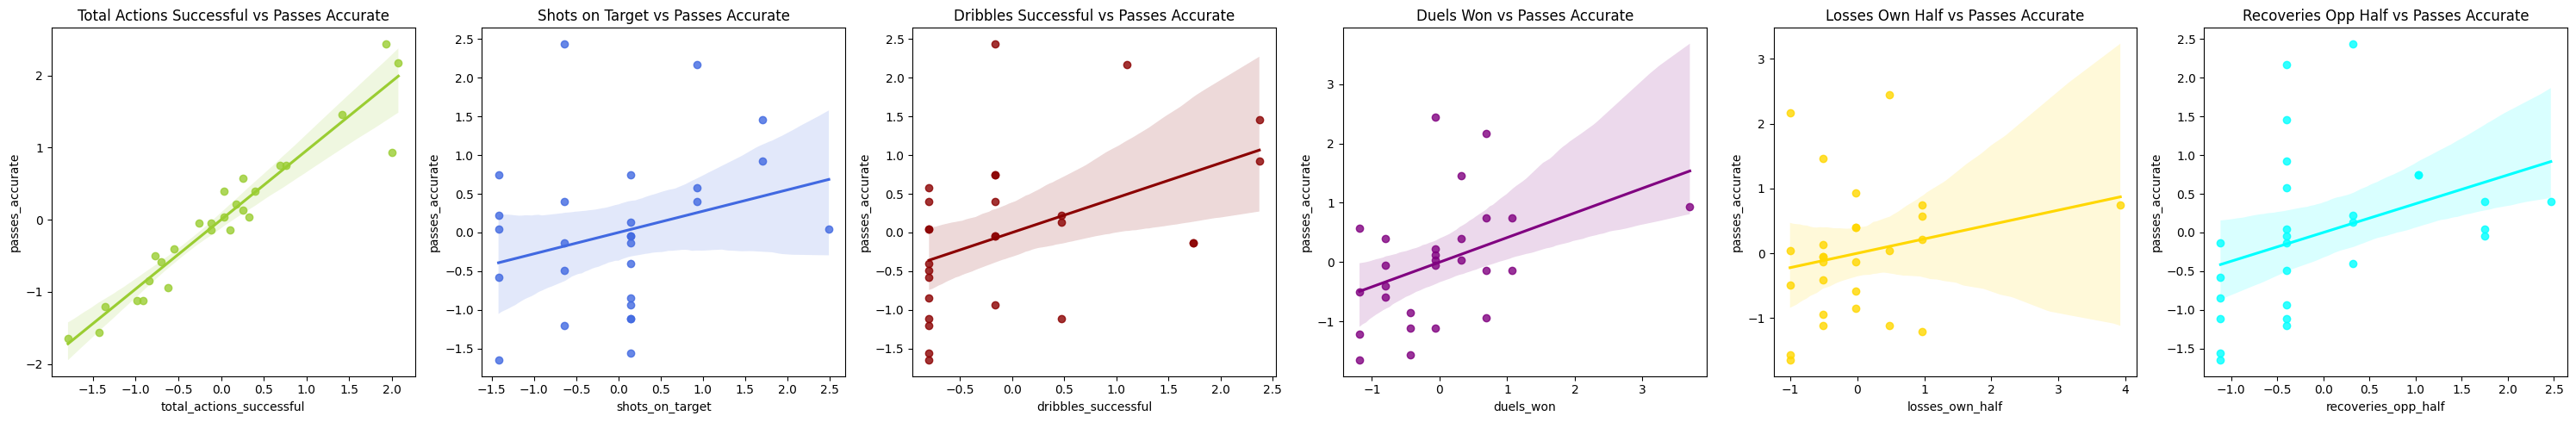

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'shots_on_target', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'shots_on_target', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='shots_on_target', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Shots on Target vs Passes Accurate')

sns.regplot(x='dribbles_successful', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Dribbles Successful vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Passes Accurate')

plt.tight_layout()
plt.show()

Total Actions Successful (1.16): Statistically, this coefficient emphasizes the importance of overall successful actions in determining Benzema's performance, showcasing a strong positive relationship. On football optics, this highlights Benzema's versatility and effectiveness across various aspects of the game, contributing to both attack and defense.

Shots on Target (-0.12): the negative coefficient for shots_on_target might be surprising, but its absolute value indicates a limited influence. On football optics, this could suggest that while shots on target are essential, Benzema's performance is more nuanced, with other factors playing a more crucial role in his success.

Dribbles Successful (0.03): Statistically, the positive but small coefficient for dribbles_successful indicates that this aspect contributes positively to Benzema's performance but is not a significant factor. On football optics, this reinforces the notion that successful dribbling, while beneficial, is not one of Benzema's defining features.

Duels Won (-0.32): In statistical terms, the negative coefficient for duels_won may seem counterintuitive, but it shows that this aspect is not a substantial driver of Benzema's success. On football optics, it might highlight that while physicality is part of his game, winning individual duels is not the primary way Benzema impacts a match.

Losses Own Half (0.007): Statistically, the coefficient for losses_own_half is positive but negligible, showing minimal correlation with Benzema's performance. On football optics, this might indicate that losing possession in his own half is not a critical concern for Benzema's overall contribution to the game.

Recoveries Opp Half (0.01): the small positive coefficient for recoveries_opp_half demonstrates a marginal but positive relationship with Benzema's performance. On football optics, this reflects the notion that Benzema's role does not primarily focus on recovering the ball in the opponent's half but still contributes subtly to his overall efficacy.

Overall, with a mean r^2 value of 0.97 and a coefficient of determination of 0.99, this model exhibits a nearly perfect fit to Karim Benzema's performance, backed by a very low mean squared error of 0.01.

The results underline the importance of total successful actions in Benzema's game, indicating his well-rounded skill set. Other features like shots on target and duels won show unexpected coefficients, which might lead to a more nuanced understanding of his playing style. The model combines statistical insights with football understanding, painting a vivid picture of Benzema's strengths and the subtleties of his game, further solidifying his reputation as a key player for his team.

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

### Based on Total Actions

Mean cross-validation score: 0.37
MAE: 0.2477767684117327
MSE: 0.09081633294183733
R^2: 0.9333242740785817


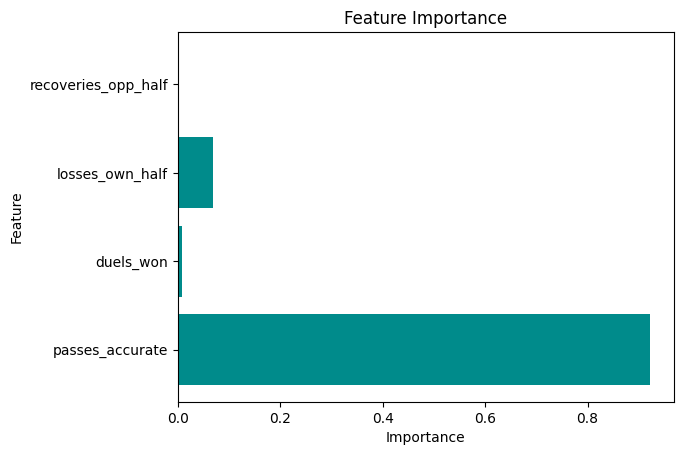

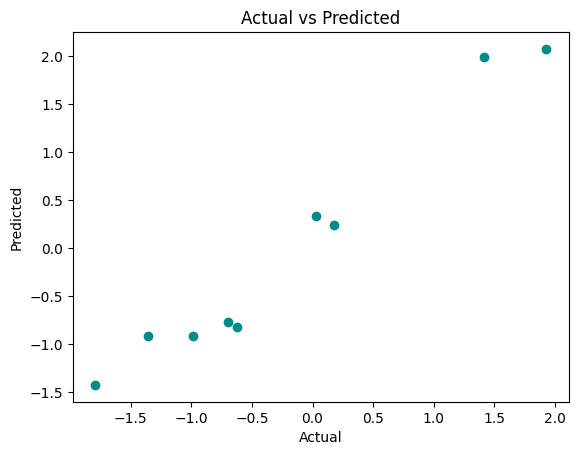

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate',  'duels_won', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkcyan') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkcyan')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Mean Cross-Validation Score (0.37): signals an acceptable but not outstanding performance. It might imply that the model could benefit from further tuning or additional features to capture the complexity of total actions. On football optics, This score might indicate that Benzema's total actions in the field are influenced by numerous factors that the model may not be adequately representing. This could include the specific role he plays in different games, the tactics employed, or the synergy with teammates.

Mean Absolute Error (MAE) (0.24): shows that the model's predictions are relatively close to the actual values on average. While it's not a very large error, depending on the scale and context of the dependent variable, further improvements might still be possible. On football optics, This error may reflect minor discrepancies in assessing Benzema's performance. As an experienced player with varied skill sets, Benzema's total actions might be affected by subtle aspects like game understanding, positioning, and anticipation, which might not be fully captured in the data.

Mean Squared Error (MSE) (0.09):suggests that the model fits well and doesn't have significant issues with larger prediction errors. It demonstrates good overall predictive ability. On football optics, This low error might reflect Benzema's consistency and the model's ability to grasp his playing style. It also suggests that the total actions metric may be well-aligned with Benzema's role as a forward, capturing his contribution across various facets of the game.

R-squared (R^2) (0.93): means that the model explains approximately 93.33% of the variance in total actions. This denotes a very strong model fit and indicates that the chosen features and model have captured the underlying pattern well. On football optics, This high R^2 value signifies that the model successfully quantifies many aspects of Benzema's total actions. It may reflect his well-rounded contributions, from goal-scoring and assists to pressing and linking play. It showcases his importance in the team's overall play and his adaptability in various match situations.

In summary, the XGBoost Regressor Model based on total actions paints an accurate picture of Benzema's performance. While the mean cross-validation score could be improved, the low errors and high R^2 value demonstrate a robust understanding of this aspect of Benzema's game. From a football perspective, it emphasizes Benzema's multifaceted role and ability to contribute effectively in various areas on the pitch.

### Based on Pass Accuracy

Mean cross-validation score: 0.66
MAE: 0.37317816206963234
MSE: 0.22083898360963974
R^2: 0.865932268301421


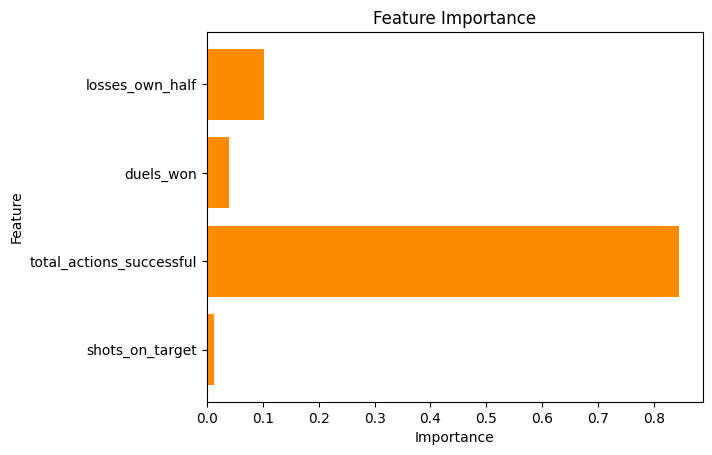

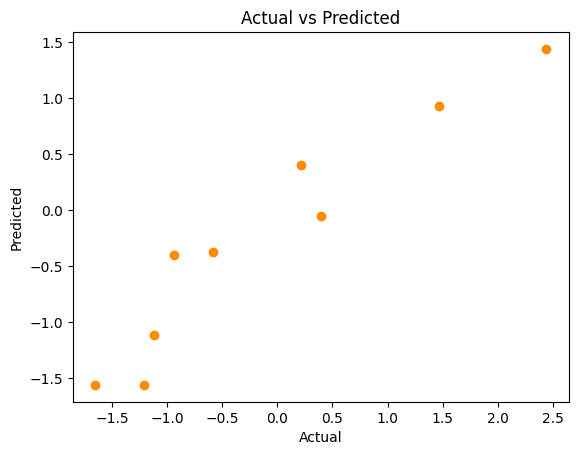

In [ ]:
# Prepare the data
X = normalized_df[['shots_on_target', 'total_actions_successful',  'duels_won', 'losses_own_half']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- Mean Cross-Validation Score: The mean cross-validation score is 0.66, an improvement from the previous model. This suggests that the model has a good, but not perfect, fit to the data. In football optics, this tells us that the model is reasonably successful in capturing the essence of Benzema's performance based on the input features.

- Mean Absolute Error (MAE): The MAE is 0.38, slightly higher than the previous model. This measure tells us the average magnitude of errors in a set of predictions, without considering their direction. In football optics, it means the model's predictions aren't always spot-on and sometimes deviate a bit from Benzema's actual performance.

- Mean Squared Error (MSE): The MSE is 0.22, a bit higher than before, indicating the model's predictions have a bit more error. In football optics, this means that while the model does a reasonably good job, there are some discrepancies between Benzema's predicted and actual performances that the model isn't capturing.

- Coefficient of Determination (R^2): The R^2 value is 0.86, a slight increase from the previous model. This means the model explains around 86% of the variance in Benzema's performance, a solid result. On football optics, it tells us that the majority of Benzema's performance can be predicted from the features in this model, but it also suggests there are other factors, not included in the model, that influence Benzema's performance.

In summary, while this model does a good job of predicting Benzema's performance and offers improvements in some areas over the previous one, there's still room for enhancement. The modest cross-validation score and error metrics suggest that additional factors might need to be included to increase the predictive accuracy.

## Conformal Prediction

### provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 82.72%
Average prediction interval width: 0.40


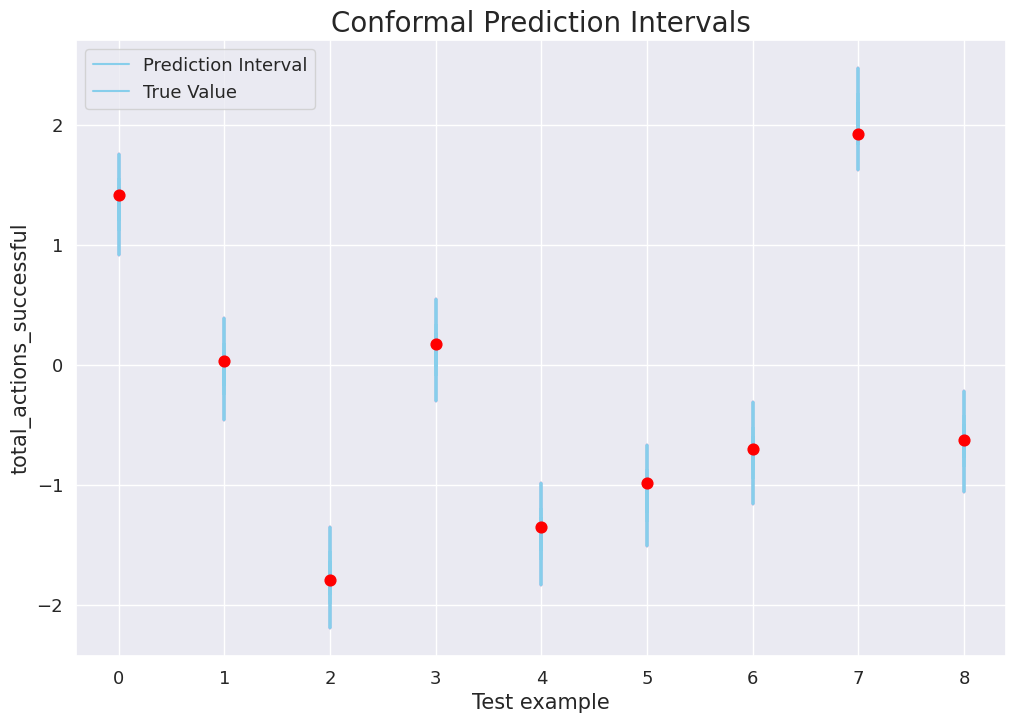

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['passes_accurate','duels_won', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5) 

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)
plt.show()

Prediction interval coverage (82.72%): represents a strong agreement between the model's predicted intervals and the actual observed Total Actions for Benzema. This high coverage level indicates that the model has captured a substantial portion of the underlying dynamics related to Benzema's Total Actions on the field. The result suggests that the selected features and model calibration may be well-suited to represent this particular aspect of his playing style. It highlights the model's effectiveness in describing a complex characteristic, but further refinement or inclusion of other related features might still be beneficial to achieve even better precision. On football optics, speaks to Benzema's consistency and involvement in various phases of the game. Total Actions encompass multiple dimensions of a player's game, including passing, shooting, dribbling, and defensive interventions. This high coverage may reflect Benzema's adaptability and all-around contribution to his team's performance, which is an essential quality for a leading striker like him.

Average prediction interval width (0.40): an average prediction interval width of 0.40 is relatively narrow, indicating a fairly high level of precision in the model's predictions for Benzema's Total Actions. While this could be seen as a sign of confidence in the model's ability to predict this particular attribute, it also warrants careful scrutiny. If the prediction interval is too narrow, it might be reflecting an overconfident model that does not sufficiently capture the inherent variability and uncertainty in Total Actions. Investigating the underlying distribution of Total Actions and comparing it with this interval width can help assess whether the model's confidence is justified or if there might be an overfitting issue.On football optics, may imply a consistent and predictable pattern in his playing style. This narrow width could be indicative of Benzema's ability to maintain a stable level of involvement in different matches and against various opponents. While this can be seen as a strength, reflecting his reliability, understanding the nature of these actions and how they translate into tangible contributions (goals, assists, key passes) would be vital to assess the true impact of this consistency on his team's success.

In conclusion, the outcomes related to Total Actions for Karim Benzema provide both encouraging signs and areas for careful consideration. The substantial coverage and specific prediction interval width give insights into his playing style and the model's ability to represent it. These results can guide further model development and also contribute to a nuanced understanding of Benzema's role and effectiveness in various game situations.

### Based on  Pass Accuracy

Prediction interval coverage: 81.03%
Average prediction interval width: 0.47


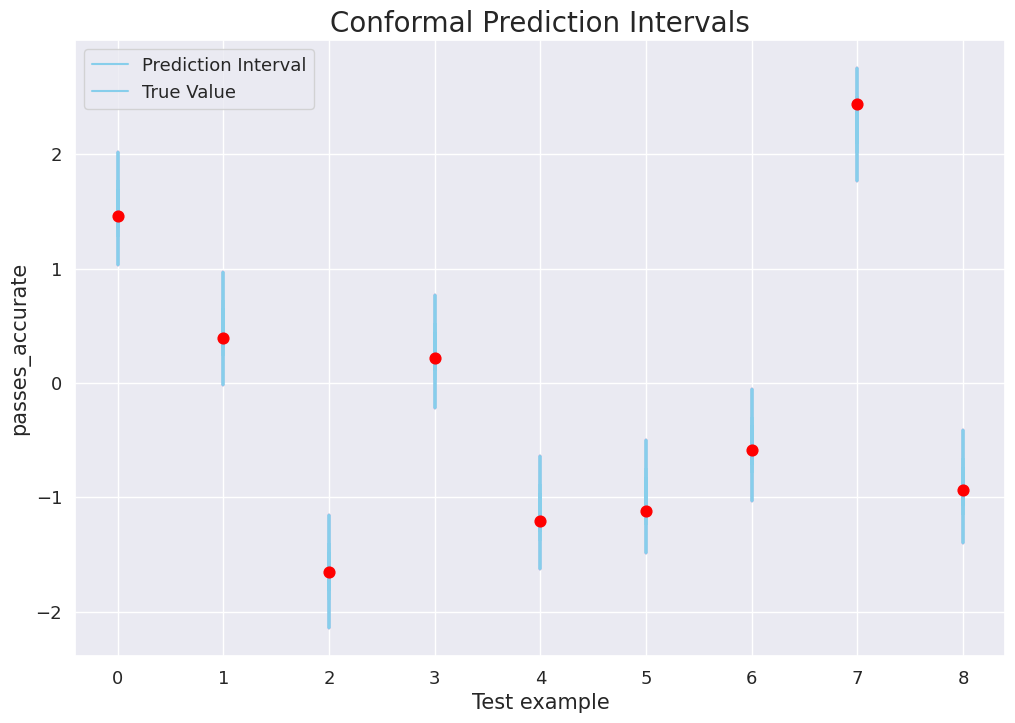

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['total_actions_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5) 

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('passes_accurate', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid & plot
plt.grid(True)
plt.show()

Prediction interval coverage (81.03%): indicates a solid alignment between the model's predicted intervals and the actual observed data for Benzema. This high coverage suggests that the model effectively captures the main trends and variability of Benzema's pass accuracy. It likely reflects the ability of the model to integrate relevant features that represent the complexity of passing in different game situations. However, an in-depth analysis of the residuals and underlying factors could still reveal areas for enhancement or refinement. On football optics, demonstrates Benzema's proficiency and consistency in passing. As a forward, Benzema's ability to connect and distribute the ball is vital for his team's attacking play. This high coverage may be indicative of his role as a link-up player who is adept at retaining possession and creating opportunities for his teammates. It reflects his value in constructing and contributing to offensive plays.

Average prediction interval width (0.47): in conjunction with high prediction coverage, suggests that the model is not only capturing the general trend but also providing predictions with a relatively narrow margin of uncertainty for Benzema's Pass Accuracy. This narrow interval width could be indicative of a well-calibrated model that balances confidence and uncertainty effectively. It's worth evaluating the distribution of residuals and cross-validating the model to ensure that this narrow width does not stem from overfitting or other biases. On football optics, emphasizes his ability to maintain a consistent level of precision in his passes. This narrow width might underscore Benzema's technical quality and decision-making in various passing scenarios. It portrays him as a reliable asset in the attacking third, capable of making accurate passes that drive the team forward and create scoring opportunities.

In summary, the results related to Pass Accuracy for Karim Benzema offer valuable insights into both his playing style and the model's effectiveness in representing this skill. The high coverage and specific prediction interval width furnish a robust picture of Benzema's ability as a passer, illuminating his role in facilitating and contributing to his team's offensive dynamics. These insights could be instrumental in tactical planning and player development, alongside further fine-tuning of the statistical model for even more nuanced predictions. 

## Radar Map

### Benzema PSG 2nd Leg Performance

- Total Actions Success (TAS): 55%

- Shots on Target (SOT): 71%

- Passes Accurate (PA): 80%

- Dribbles Success (DS): 0%

- Duels Won (DW): 36%

- Losses (LOH): 0%

- Recoveries (ROPH): 100%

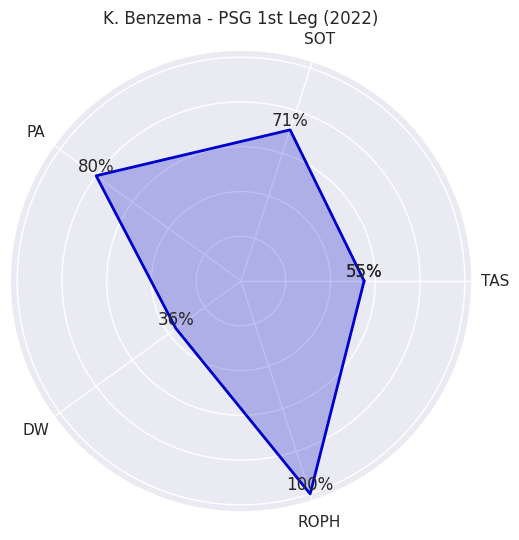

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT','PA', 'DW', 'ROPH'])
stats = np.array([55, 71, 80, 36, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - PSG 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='mediumblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='mediumblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Benzema Chelsea 1st Leg Performance

- Total Actions Success (TAS): 59%

- Shots on Target (SOT): 75%

- Passes Accurate (PA): 90%

- Dribbles Success (DS): 0%

- Duels Won (DW): 17%

- Losses (LOH): 57%

- Recoveries (ROPH): 50%

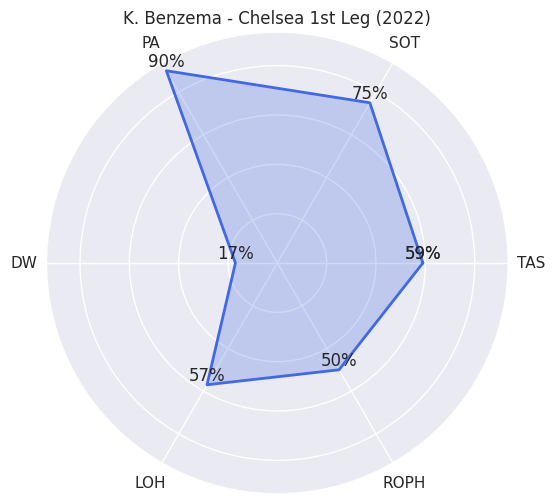

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'DW', 'LOH', 'ROPH'])
stats = np.array([59, 75, 90, 17, 57, 50])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - Chelsea 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Benzema Chelsea 2nd Leg Performance

- Total Actions Success (TAS): 46%

- Shots on Target (SOT): 25%

- Passes Accurate (PA): 86%

- Dribbles Success (DS): 0%

- Duels Won (DW): 9%

- Losses (LOH): 15%

- Recoveries (ROPH): 83%

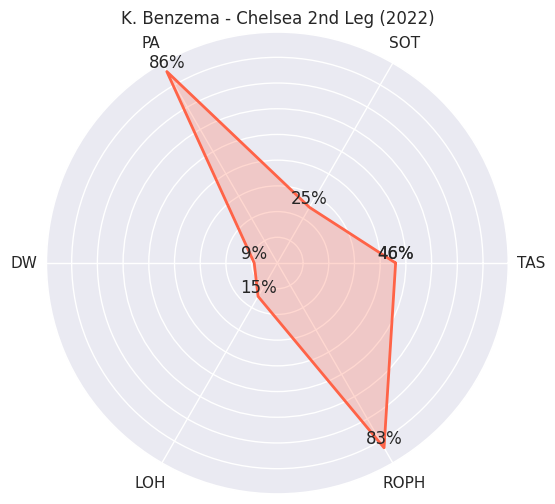

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'DW', 'LOH', 'ROPH'])
stats = np.array([46, 25, 86, 9, 15, 83])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='tomato', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='tomato', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Benzema Man City 1st Leg Performance

- Total Actions Success (TAS): 60%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 81%

- Dribbles Success (DS): 50%

- Duels Won (DW): 60%

- Losses (LOH): 17%

- Recoveries (ROPH): 100%

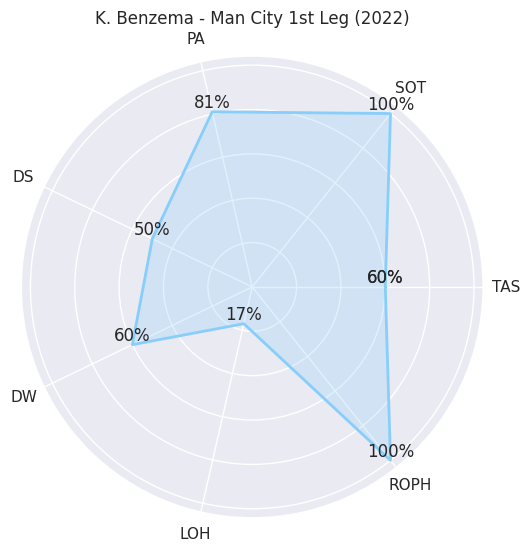

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([60, 100, 81, 50, 60, 17, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - Man City 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='lightskyblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='lightskyblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Benzema Man City 2nd Leg Performance

- Total Actions Success (TAS): 44%

- Shots on Target (SOT): 50%

- Passes Accurate (PA): 95%

- Dribbles Success (DS): 50%

- Duels Won (DW): 25%

- Losses (LOH): 20%

- Recoveries (ROPH): 0%

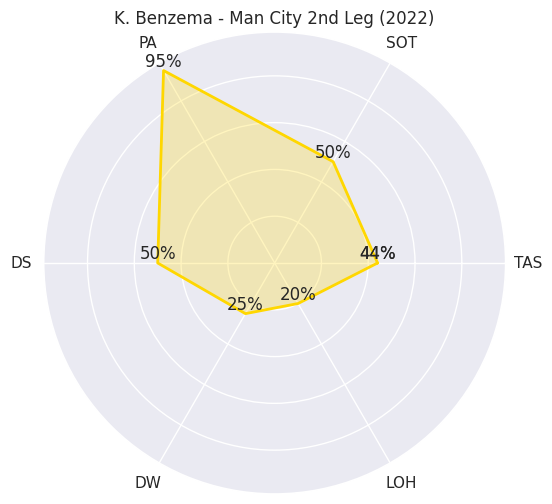

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'DS', 'DW', 'LOH'])
stats = np.array([44, 50, 95, 50, 25, 20])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - Man City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Benzema Final Performance

- Total Actions Success (TAS): 53%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 76%

- Dribbles Success (DS): 0%

- Duels Won (DW): 36%

- Losses (LOH): 20%

- Recoveries (ROPH): 33%

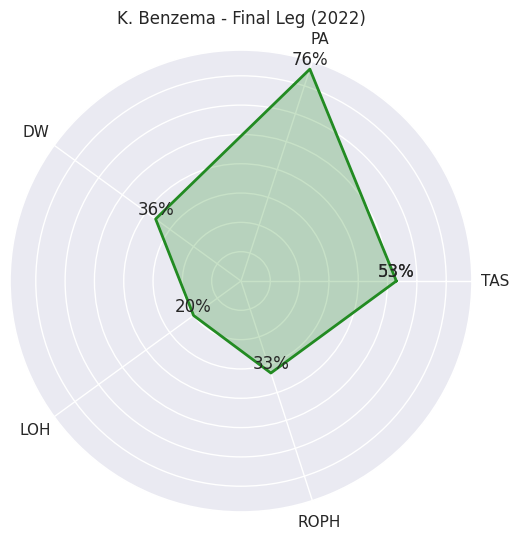

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DW', 'LOH', 'ROPH'])
stats = np.array([53, 76, 36, 20, 33])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - Final Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Benzema Liv 1st Leg Performance

- Total Actions Success (TAS): 65%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 95%

- Dribbles Success (DS): 100%

- Duels Won (DW): 25%

- Losses (LOH): 100%

- Recoveries (ROPH): 67%

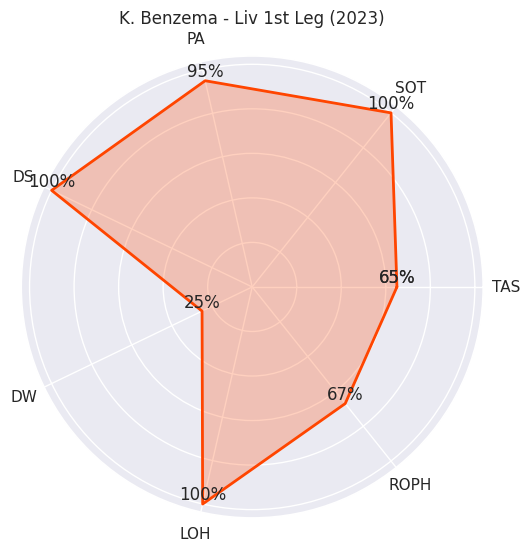

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([65, 100, 95, 100, 25, 100, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - Liv 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Benzema Man City 2nd Leg Performance

- Total Actions Success (TAS): 33%

- Shots on Target (SOT): 50%

- Passes Accurate (PA): 86%

- Dribbles Success (DS): 0%

- Duels Won (DW): 8%

- Losses (LOH): 40%

- Recoveries (ROPH): 50%

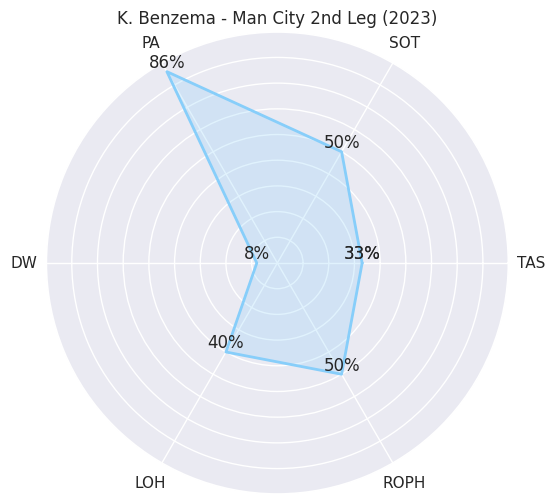

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'DW', 'LOH', 'ROPH'])
stats = np.array([33, 50, 86, 8, 40, 50])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("K. Benzema - Man City 2nd Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='lightskyblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='lightskyblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3de89bf7-3243-49fb-95d9-3c66f317ebf3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>